### dataset

In [1]:
import torch
import os 
#  datasets dir
root_path= "E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/"
mark_seg_root=root_path+"bounding_box_train_seg/"
mark_root=root_path+"bounding_box_train/"
if os.path.exists(mark_seg_root) and os.path.exists(mark_root):
    print(mark_root)
    print(mark_seg_root)

E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/
E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/


In [2]:
def read_images(root=root_path,train=True):
    filename=root+('bounding_box_train/'if train else 'query/')
    images = os.listdir(filename)
    images_list=[]
    for i in images:
        if i.endswith('.jpg'):
            images_list.append(i)
    data=[os.path.join(filename,i)for i in images_list]
    filename_seg=root+('bounding_box_train_seg/'if train else 'query_seg/')
    images_seg = os.listdir(filename_seg)
    images_seg_list=[]
    for i in images_seg:
        if i.endswith('.png'):
            images_seg_list.append(i)
    label=[os.path.join(filename_seg,i)for i in images_seg_list]
    return data,label

In [3]:
import os
data,label=read_images()
print(data,label)

['E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s1_000451_03.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s1_000551_01.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s1_000776_01.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s1_000801_01.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s1_069056_02.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s2_000841_01.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s2_050821_02.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s2_050846_02.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train/0002_c1s2_064446_01.jpg', 'E:/gyx/Paper/PRID/Test/dataset/ReID

 ['E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s1_000451_03.png', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s1_000551_01.png', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s1_000776_01.png', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s1_000801_01.png', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s1_069056_02.png', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s2_000841_01.png', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s2_050821_02.png', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s2_050846_02.png', 'E:/gyx/Paper/PRID/Test/dataset/ReID-Mask-CVPR2018/market1501/bounding_box_train_seg/0002_c1s2_064446_01.png',

In [4]:
import random
from torchvision.transforms import transforms as tfs
def rand_crop(data,label):
    h,w,_=data.shape
    while h>0:
        if h%32 != 0:
            h-=1
        else:break

    while w>0:
        if w%32 != 0: 
            w-=1 
        else:break  
    data=data[0:h,0:w]
    label=label[0:h,0:w]
    return data,label

In [5]:
h,w=64,128
while h>0:
        if h%32 != 0:
            h-=1
        else:break

while w>0:
        if w%32 != 0: 
            w-=1 
        else:break
print((h,w))

(64, 128)


In [6]:
classes = ['background','person']

# RGB color for each class
colormap = [[0,0,0],[255,255,255]]

len(classes), len(colormap)

(2, 2)

In [7]:
import numpy as np
cm2lbl=np.zeros(256**3)
# print(cm2lbl.size)#16777216
for i,cm in enumerate(colormap):
#     print('i',i)    #    0                1
#     print('cm',cm) #[0, 0, 0]     [255, 255, 255]
#     print((cm[0]*256+cm[1])*256+cm[2])
    cm2lbl[(cm[0]*256+cm[1])*256+cm[2]]=i
#     print(cm2lbl)

def image2label(im):
    data=np.array(im,dtype='int32')
    idx=(data[:,:,0]*256+data[:,:,1])*256+data[:,:,2]
    return np.array(cm2lbl[idx],dtype='int64')

In [8]:
from PIL import Image
label_im = Image.open(os.path.join(mark_seg_root,os.listdir(mark_seg_root)[0])).convert('RGB')
label_im.show()

label = image2label(label_im)
label[0:60, 0:60]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
def img_transforms(im,label):
#     im=im.resize((crop_size[0], crop_size[1]),Image.BILINEAR)
#     label=label.resize((crop_size[0], crop_size[1]),Image.BILINEAR)
    im,label=rand_crop(im,label)
    im_tfs=tfs.Compose([
        tfs.ToTensor(),
        tfs.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    im=im_tfs(im)
    label=image2label(label)
    label=torch.from_numpy(label)
    return im,label

In [10]:
from torch.utils.data import Dataset
import cv2
class martSegDataset(Dataset):
    def __init__(self,train,transforms):
        self.transforms=transforms
        self.data_list,self.label_list=read_images(train=train)
#         self.data_list=self._filter(data_list)
#         self.label_list=self._filter(label_list)
#         print(Image.open(self.data_list[0]).size)
        print('Read'+ ' '+ str(len(self.data_list))+' '+'images')
        print('Read'+ ' '+ str(len(self.label_list))+' '+'labels')

    def _filter(self,images):
        return [im for im in images if im.endswith('.jpg') and (Image.open(im).size[0] >= self.crop_size[0] and
                                      Image.open(im).size[1] >= self.crop_size[1])]
    def __getitem__(self,idx):
        img=self.data_list[idx]
        label=self.label_list[idx]
        img=cv2.imread(img)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        label=cv2.imread(label)
        label=cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
        img,label=self.transforms(img,label)
        return img,label
    
    def __len__(self):
        return len(self.data_list)

In [11]:
mart_train=martSegDataset(True,img_transforms)
mart_test=martSegDataset(False,img_transforms)

Read 12936 images
Read 12936 labels
Read 3368 images
Read 3368 labels


In [12]:
from torch.utils.data import DataLoader
train_data=DataLoader(mart_train,batch_size=16,shuffle=True)
valid_data=DataLoader(mart_test,batch_size=16)

In [13]:
import torch
import  matplotlib.pyplot as plt
def bilinear_kernel(in_channels,out_channels,kernel_size):
    factor=(kernel_size+1)//2
    if kernel_size%2==1:
        center=factor-1
    else:
        center=factor-0.5
    og=np.ogrid[:kernel_size,:kernel_size]
    filt=(1-abs(og[0]-center)/factor)*(1-abs(og[1]-center)/factor)
    weight=np.zeros((in_channels,out_channels,kernel_size,kernel_size),dtype='float32')
    weight[range(in_channels),range(out_channels),:,:]=filt
    return torch.from_numpy(weight)

x=Image.open(os.path.join(mark_root,os.listdir(mark_root)[0]))
x=np.array(x)
plt.imshow(x)
plt.show()

<Figure size 640x480 with 1 Axes>

(256, 128, 3)


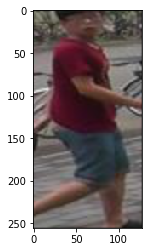

In [14]:
import  torch.nn as nn
from torch.autograd import Variable
x=torch.from_numpy(x.astype('float32')).permute(2,0,1).unsqueeze(0)
conv_trans=nn.ConvTranspose2d(3,3,4,2,1)
conv_trans.weight.data=bilinear_kernel(3,3,4)

y=conv_trans(Variable(x)).data.squeeze().permute(1,2,0).numpy()
plt.imshow(y.astype('uint8'))
print(y.shape)

### model

In [21]:
from torchvision import models
# pretrained_net=models.resnet34(pretrained=True)
pretrained_net=models.resnet50(pretrained=True)
num_classes=len(classes)

In [22]:
class fcn(nn.Module):
    def __init__(self, num_classes):
        super(fcn, self).__init__()

        self.stage1 = nn.Sequential(*list(pretrained_net.children())[:-4]) # 第一段
        self.stage2 = list(pretrained_net.children())[-4] # 第二段
        self.stage3 = list(pretrained_net.children())[-3] # 第三段
        
        self.scores1 = nn.Conv2d(2048, num_classes, 1)
        self.scores2 = nn.Conv2d(1024, num_classes, 1)
        self.scores3 = nn.Conv2d(512, num_classes, 1)
        
        self.upsample_8x = nn.ConvTranspose2d(num_classes, num_classes, 16, 8, 4, bias=False)
        self.upsample_8x.weight.data = bilinear_kernel(num_classes, num_classes, 16) # 使用双线性 kernel
        
        self.upsample_4x = nn.ConvTranspose2d(num_classes, num_classes, 4, 2, 1, bias=False)
        self.upsample_4x.weight.data = bilinear_kernel(num_classes, num_classes, 4) # 使用双线性 kernel
        
        self.upsample_2x = nn.ConvTranspose2d(num_classes, num_classes, 4, 2, 1, bias=False)   
        self.upsample_2x.weight.data = bilinear_kernel(num_classes, num_classes, 4) # 使用双线性 kernel

        
    def forward(self, x):
        x = self.stage1(x)
        s1 = x # 1/8
#         print('s1.shape',s1.shape)  #s1.shape torch.Size([6, 128, 40, 60])
        
        x = self.stage2(x)
        s2 = x # 1/16
#         print('s2.shape',s2.shape)  #s2.shape torch.Size([6, 256, 20, 30])
        
        x = self.stage3(x)
        s3 = x # 1/32
#         print('s3.shape',s3.shape) #s3.shape torch.Size([6, 512, 10, 15])
        
        s3 = self.scores1(s3)
#         print('s3.shape',s3.shape)  #s3.shape torch.Size([6, 21, 10, 15])
        s3 = self.upsample_2x(s3)
#         print('s3.shape',s3.shape) #s3.shape torch.Size([6, 21, 20, 30])

        s2 = self.scores2(s2)
#         print('s2.shape',s2.shape)  #s2.shape torch.Size([6, 21, 20, 30]) 
        
        s2 = s2 + s3
        
        s1 = self.scores3(s1)
#         print('s1.shape',s1.shape)  s1.shape torch.Size([6, 21, 40, 60])
        s2 = self.upsample_4x(s2)
        s = s1 + s2

        s = self.upsample_8x(s)
        return s
        

In [ ]:
def _fast_hist(label_true, label_pred, n_class):
    mask = (label_true >= 0) & (label_true < n_class)
    hist = np.bincount(
        n_class * label_true[mask].astype(int) +
        label_pred[mask], minlength=n_class ** 2).reshape(n_class, n_class)
    return hist


def label_accuracy_score(label_trues, label_preds, n_class):
    """Returns accuracy score evaluation result.
      - overall accuracy
      - mean accuracy
      - mean IU
      - fwavacc
    """
    hist = np.zeros((n_class, n_class))
    for lt, lp in zip(label_trues, label_preds):
        hist += _fast_hist(lt.flatten(), lp.flatten(), n_class)
    acc = np.diag(hist).sum() / hist.sum()
    acc_cls = np.diag(hist) / hist.sum(axis=1)
    acc_cls = np.nanmean(acc_cls)
    iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist))
    mean_iu = np.nanmean(iu)
    freq = hist.sum(axis=1) / hist.sum()
    fwavacc = (freq[freq > 0] * iu[freq > 0]).sum()
    return acc, acc_cls, mean_iu, fwavacc

### optim

In [ ]:
criterion = nn.NLLLoss2d()

net=fcn(num_classes)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, weight_decay=1e-4)

### Train

In [ ]:
import time
import torch.nn.functional as F
min_acc = 0
for e in range(200):
    
    train_loss = 0
    train_acc = 0
    train_acc_cls = 0
    train_mean_iu = 0
    train_fwavacc = 0
    
    prev_time = time.time()
    net = net.train()
    net=net.cuda()
    for data in train_data:
        im = Variable(data[0].cuda())
        label = Variable(data[1].cuda())
#         print(label.shape)
        # forward
        out = net(im)
#         print(out.shape)
        out = F.log_softmax(out, dim=1) # (b, n, h, w)
        loss = criterion(out, label)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.data
        
        label_pred = out.max(dim=1)[1].data.cpu().numpy()
        label_true = label.data.cpu().numpy()
        for lbt, lbp in zip(label_true, label_pred):
            acc, acc_cls, mean_iu, fwavacc = label_accuracy_score(lbt, lbp, num_classes)
            train_acc += acc
            train_acc_cls += acc_cls
            train_mean_iu += mean_iu
            train_fwavacc += fwavacc
        
    net = net.eval()
    eval_loss = 0
    eval_acc = 0
    eval_acc_cls = 0
    eval_mean_iu = 0
    eval_fwavacc = 0
    for data in valid_data:
        im = Variable(data[0].cuda(), volatile=True)
        label = Variable(data[1].cuda(), volatile=True)
        # forward
        out = net(im)
        out = F.log_softmax(out, dim=1)
        loss = criterion(out, label)
        eval_loss += loss.data
        
        label_pred = out.max(dim=1)[1].data.cpu().numpy()
        label_true = label.data.cpu().numpy()
        for lbt, lbp in zip(label_true, label_pred):
            acc, acc_cls, mean_iu, fwavacc = label_accuracy_score(lbt, lbp, num_classes)
            eval_acc += acc
            eval_acc_cls += acc_cls
            eval_mean_iu += mean_iu
            eval_fwavacc += fwavacc
        
    cur_time = time.time()

    epoch_str = ('Epoch: {}, Train Loss: {:.5f}, Train Acc: {:.5f}, Train Mean IU: {:.5f}, \
Valid Loss: {:.5f}, Valid Acc: {:.5f}, Valid Mean IU: {:.5f} '.format(
        e, train_loss / len(train_data), train_acc / len(mart_train), train_mean_iu / len(mart_train),
        eval_loss / len(valid_data), eval_acc / len(mart_test), eval_mean_iu / len(mart_test)))
    
    if (eval_acc / len(mart_test)) > min_acc:
            min_acc = eval_acc / len(mart_test)
            torch.save(net.state_dict(),'market_fcn_resnet50_%d.pth'%e)
   
    print(epoch_str)

### predict

In [ ]:
net=fcn(num_classes)
net.load_state_dict(torch.load('./market_fcn_resnet50_176.pth'))
net=net.cuda()

### Dataset_duck

In [15]:
#  datasets dir
duck_root="D:/z_File/duck_mtmc/DukeMTMC-reID/"
if os.path.exists(duck_root):
    print(duck_root)

D:/z_File/duck_mtmc/DukeMTMC-reID/


In [16]:
def read_images_duck(root=duck_root):
    txt_filename=root+'bounding_box_train_new/'
    images = os.listdir(txt_filename)
    data=[os.path.join(txt_filename,i)for i in images]
    return data

In [17]:
import os
data=read_images_duck()
print(data[0])
if os.path.exists(data[0]):
    print('true')

D:/z_File/duck_mtmc/DukeMTMC-reID/bounding_box_train_new/0001_c2_f0046182.jpg
true


In [ ]:
'''
RuntimeError: The size of tensor a (7) must match the size of tensor b (8) at non-singleton dimension 3
由于输入图像的尺寸除以2，再除以2的时候会出现奇数，比如34，除以2为17，再除以2则除不了，再进行尺寸翻倍的时候，
会出现尺码size不一致的情况发生，所以我们需要前期在尺度下手，提前进行crop,修改尺寸成为可以除以4的情况。
s1.shape torch.Size([1, 128, 34, 14])
s2.shape torch.Size([1, 256, 17, 7])
s3.shape torch.Size([1, 512, 9, 4])
s3.shape torch.Size([1, 21, 9, 4])
s3.shape torch.Size([1, 21, 18, 8])
s2.shape torch.Size([1, 21, 17, 7])
这里rand_crop_duck进行裁剪图像以适合网络，为什么整除32，因为resnet需要图像整除8，而之后的fcn需要图像能整除4，则为32
'''

### resize the inages(256,128)

In [ ]:
# import os
# import cv2
# ''' 设置图片路径，该路径下包含了14张jpg格式的照片，名字依次为0.jpg, 1.jpg, 2.jpg,...,14.jpg'''
# DATADIR="D:\Code\ToolBox"
# '''设置目标像素大小，此处设为300'''
# IMG_SIZE=300
# '''使用os.path模块的join方法生成路径'''
# path=os.path.join(DATADIR) 
# '''使用os.listdir(path)函数，返回path路径下所有文件的名字，以及文件夹的名字，
# 例如，执行下行代码后，img_list是一个list，值为['0.jpg','1.jpg','10.jpg','11.jpg','12.jpg','13.jpg','14.jpg',
# '2.jpg','3.jpg','4.jg', '5.jpg', '6.jpg', '7.jpg', 
# '8.jpg', '9.jpg']，注意这个顺序并没有按照从小到大的顺序排列'''
# img_list=os.listdir(path)
# ind=0
# for i in img_list:
# '''调用cv2.imread读入图片，读入格式为IMREAD_COLOR'''
#     img_array=cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR)
#     '''调用cv2.resize函数resize图片'''
#     new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#     img_name=str(ind)+'.jpg'
#     '''生成图片存储的目标路径'''
#     save_path='D:\\Code\\resized\\'+str(ind)+'.jpg'
#     ind=ind+1
#     '''调用cv.2的imwrite函数保存图片'''
#     cv2.imwrite(save_path,new_array)

In [25]:
import random
from torchvision.transforms import transforms as tfs
def rand_crop_duck(data):
    h,w,_=data.shape
    
    while h>0:
        if h%32 != 0:
            h-=1
        else:break

    while w>0:
        if w%32 != 0: 
            w-=1 
        else:break  
    
    data=data[0:h,0:w]
#     print(data.shape)
    return data

In [26]:
h,w= 108,271
while h>0:
    if h%32 != 0:
        h-=1
    else:
        break

while w>0:
    if w%32 != 0: 
        w-=1 
    else:break
    
print(h)
print(w)

96
256


In [27]:
def duck_transforms(im):
    im=rand_crop_duck(im)
    im_tfs=tfs.Compose([
        tfs.ToTensor(),
        tfs.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    im=im_tfs(im)
    return im

In [28]:
from torch.utils.data import Dataset
import cv2
class duckSegDataset(Dataset):
    def __init__(self,transforms):
        self.transforms=transforms
        self.data_list=read_images_duck()
#         self.data_list=self._filter(data_list)
        print(Image.open(self.data_list[0]).size)
        print('Read'+str(len(self.data_list))+'images')
    def _filter(self,images):
        return [im for im in images if(Image.open(im).size[0] >= self.crop_size[0] and
                                      Image.open(im).size[1] >= self.crop_size[1])]
    def __getitem__(self,idx):
        img=self.data_list[idx]
        img=cv2.imread(img)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=self.transforms(img)
        return img
    
    def __len__(self):
        return len(self.data_list)

In [29]:
# input_shape=(50,150)
duck_test=duckSegDataset(duck_transforms)

(128, 256)
Read16522images


In [ ]:
import torch
import  matplotlib.pyplot as plt

x=Image.open(data[0])
x=np.array(x)
plt.imshow(x)
plt.show()

In [ ]:
# 定义预测函数
cm = np.array(colormap).astype('uint8')

def predict(net,im): # 预测结果
    im = Variable(im.unsqueeze(0)).cuda()
    out = net(im)
    pred = out.max(1)[1].squeeze().cpu().data.numpy()
    pred = cm[pred]
    return pred

save_path=duck_root+'bounding_box_test_seg/'
if os.path.exists(save_path):
    print(save_path)
else:
    os.mkdir(save_path)

    
_, figs = plt.subplots(20, 2, figsize=(10, 40))
for i in range(20):
    test_data = duck_test[i]
    pred = predict(net,test_data)
    img_name=duck_test.data_list[i].split('/')[-1]
    print(img_name)
    figs[i, 0].imshow(Image.open(duck_test.data_list[i]))
    figs[i, 0].axes.get_xaxis().set_visible(False)
    figs[i, 0].axes.get_yaxis().set_visible(False)
    figs[i, 1].imshow(pred)
    save_img=save_path+str(img_name)
    cv2.imwrite(save_img,pred)
    figs[i, 1].axes.get_xaxis().set_visible(False)
    figs[i, 1].axes.get_yaxis().set_visible(False)


### add dataset

In [ ]:
import torch
import os 
#  datasets dir
chuk_root_path= "D:/z_File/duck_mtmc/DukeMTMC-reID/dataset/chuk03-np_labeled/"
chuk_seg_root=chuk_root_path+"bounding_box_train_seg_new/"
chuk_root=chuk_root_path+"bounding_box_train_new/"
if os.path.exists(chuk_seg_root) and os.path.exists(chuk_root):
    print(chuk_root)
    print(chuk_seg_root)

In [ ]:
def read_chuk_images(root=chuk_root_path,train=True):
    filename=root+('bounding_box_train_new/'if train else 'query_new/')
    images = os.listdir(filename)
    images_list=[]
    for i in images:
        if i.endswith('.png'):
            images_list.append(i)
    data=[os.path.join(filename,i)for i in images_list]
    filename_seg=root+('bounding_box_train_seg_new/'if train else 'query_seg_new/')
    images_seg = os.listdir(filename_seg)
    images_seg_list=[]
    for i in images_seg:
        if i.endswith('.png'):
            images_seg_list.append(i)
    label=[os.path.join(filename_seg,i)for i in images_seg_list]
    return data,label

In [ ]:
import os
data_chuk,label_chuk=read_chuk_images()
print(data_chuk,label_chuk)

In [ ]:
def img_transforms_chuk(im,label):
#     im=im.resize((crop_size[0], crop_size[1]),Image.BILINEAR)
#     label=label.resize((crop_size[0], crop_size[1]),Image.BILINEAR)
#     im,label=rand_crop(im,label)
    im_tfs=tfs.Compose([
        tfs.ToTensor(),
        tfs.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    im=im_tfs(im)
    label=image2label(label)
    label=torch.from_numpy(label)
    return im,label

In [ ]:
from torch.utils.data import Dataset
import cv2
class chukSegDataset(Dataset):
    def __init__(self,train,transforms):
        self.transforms=transforms
        self.data_list,self.label_list=read_images(train=train)
#         self.data_list=self._filter(data_list)
#         self.label_list=self._filter(label_list)
#         print(Image.open(self.data_list[0]).size)
        print('Read'+ ' '+ str(len(self.data_list))+' '+'images')
        print('Read'+ ' '+ str(len(self.label_list))+' '+'labels')

    def __getitem__(self,idx):
        img=self.data_list[idx]
        label=self.label_list[idx]
        img=cv2.imread(img)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        label=cv2.imread(label)
        label=cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
        img,label=self.transforms(img,label)
        return img,label
    
    def __len__(self):
        return len(self.data_list)

In [ ]:
chuk_train=chukSegDataset(True,img_transforms_chuk)
chuk_test=chukSegDataset(False,img_transforms_chuk)

In [ ]:
from torch.utils.data import DataLoader
chuk_train_data=DataLoader(chuk_train,batch_size=16,shuffle=True)
chuk_valid_data=DataLoader(chuk_test,batch_size=16)

In [ ]:
net=fcn(num_classes)
net.load_state_dict(torch.load('./market_fcn_resnet50_176.pth'))
net=net.cuda()

In [ ]:
criterion = nn.NLLLoss2d()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, weight_decay=1e-4)

In [ ]:
import time
import torch.nn.functional as F
min_acc = 0
for e in range(200):
    
    train_loss = 0
    train_acc = 0
    train_acc_cls = 0
    train_mean_iu = 0
    train_fwavacc = 0
    
    prev_time = time.time()
    net = net.train()
    net=net.cuda()
    for data in chuk_train_data:
        im = Variable(data[0].cuda())
        label = Variable(data[1].cuda())
#         print(label.shape)
        # forward
        out = net(im)
#         print(out.shape)
        out = F.log_softmax(out, dim=1) # (b, n, h, w)
        loss = criterion(out, label)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.data
        
        label_pred = out.max(dim=1)[1].data.cpu().numpy()
        label_true = label.data.cpu().numpy()
        for lbt, lbp in zip(label_true, label_pred):
            acc, acc_cls, mean_iu, fwavacc = label_accuracy_score(lbt, lbp, num_classes)
            train_acc += acc
            train_acc_cls += acc_cls
            train_mean_iu += mean_iu
            train_fwavacc += fwavacc
        
    net = net.eval()
    eval_loss = 0
    eval_acc = 0
    eval_acc_cls = 0
    eval_mean_iu = 0
    eval_fwavacc = 0
    for data in chuk_valid_data:
        im = Variable(data[0].cuda(), volatile=True)
        label = Variable(data[1].cuda(), volatile=True)
        # forward
        out = net(im)
        out = F.log_softmax(out, dim=1)
        loss = criterion(out, label)
        eval_loss += loss.data
        
        label_pred = out.max(dim=1)[1].data.cpu().numpy()
        label_true = label.data.cpu().numpy()
        for lbt, lbp in zip(label_true, label_pred):
            acc, acc_cls, mean_iu, fwavacc = label_accuracy_score(lbt, lbp, num_classes)
            eval_acc += acc
            eval_acc_cls += acc_cls
            eval_mean_iu += mean_iu
            eval_fwavacc += fwavacc
        
    cur_time = time.time()

    epoch_str = ('Epoch: {}, Train Loss: {:.5f}, Train Acc: {:.5f}, Train Mean IU: {:.5f}, \
Valid Loss: {:.5f}, Valid Acc: {:.5f}, Valid Mean IU: {:.5f} '.format(
        e, train_loss / len(train_data), train_acc / len(mart_train), train_mean_iu / len(mart_train),
        eval_loss / len(valid_data), eval_acc / len(mart_test), eval_mean_iu / len(mart_test)))
    
    if (eval_acc / len(mart_test)) > min_acc:
            min_acc = eval_acc / len(mart_test)
            torch.save(net.state_dict(),'chuk_fcn_resnet50_%d.pth'%e)
   
    print(epoch_str)

### predict again

In [23]:
net=fcn(num_classes)
net.load_state_dict(torch.load('./chuk_fcn_resnet50_177.pth'))
net=net.cuda()

D:/z_File/duck_mtmc/DukeMTMC-reID/bounding_box_train_seg/
0001_c2_f0046182.jpg
0001_c2_f0046302.jpg
0001_c2_f0046422.jpg
0001_c2_f0046542.jpg
0001_c2_f0046662.jpg
0001_c2_f0046782.jpg
0001_c2_f0046902.jpg
0001_c2_f0047022.jpg
0001_c5_f0051247.jpg
0001_c5_f0051367.jpg
0001_c5_f0051487.jpg
0001_c5_f0051607.jpg
0001_c5_f0051727.jpg
0001_c5_f0051847.jpg
0001_c6_f0030329.jpg
0001_c6_f0030449.jpg
0001_c6_f0030569.jpg
0001_c6_f0030689.jpg
0001_c6_f0030809.jpg
0001_c6_f0030929.jpg


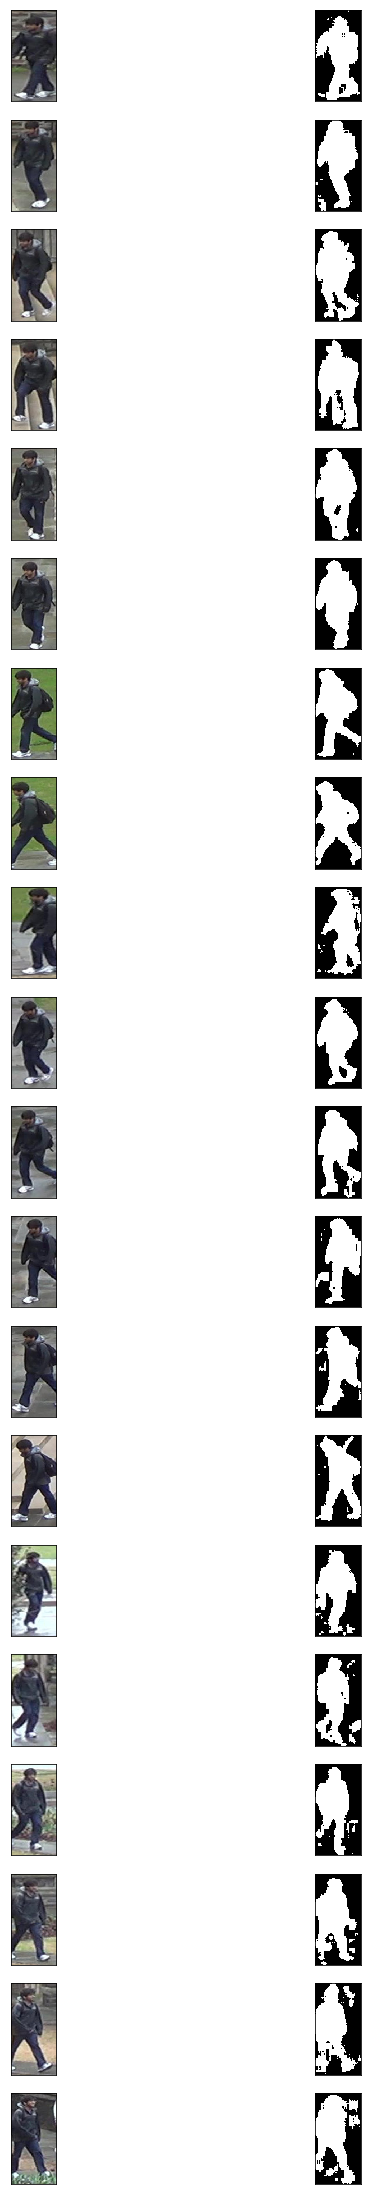

In [30]:
# 定义预测函数
cm = np.array(colormap).astype('uint8')

def predict(net,im): # 预测结果
    im = Variable(im.unsqueeze(0)).cuda()
    out = net(im)
    pred = out.max(1)[1].squeeze().cpu().data.numpy()
    pred = cm[pred]
    return pred

save_path=duck_root+'bounding_box_train_seg/'
if os.path.exists(save_path):
    print(save_path)
else:
    os.mkdir(save_path)

    
_, figs = plt.subplots(20, 2, figsize=(10, 40))
for i in range(20):
    test_data = duck_test[i]
    pred = predict(net,test_data)
    img_name=duck_test.data_list[i].split('/')[-1]
    print(img_name)
    figs[i, 0].imshow(Image.open(duck_test.data_list[i]))
    figs[i, 0].axes.get_xaxis().set_visible(False)
    figs[i, 0].axes.get_yaxis().set_visible(False)
    figs[i, 1].imshow(pred)
    save_img=save_path+str(img_name)
    cv2.imwrite(save_img,pred)
    figs[i, 1].axes.get_xaxis().set_visible(False)
    figs[i, 1].axes.get_yaxis().set_visible(False)


In [31]:
for i in range(len(duck_test)):
    test_data = duck_test[i]
    pred = predict(net,test_data)
    img_name=duck_test.data_list[i].split('/')[-1]
    print(img_name)
    save_img=save_path+str(img_name)
    cv2.imwrite(save_img,pred)

0001_c2_f0046182.jpg
0001_c2_f0046302.jpg
0001_c2_f0046422.jpg
0001_c2_f0046542.jpg
0001_c2_f0046662.jpg
0001_c2_f0046782.jpg
0001_c2_f0046902.jpg
0001_c2_f0047022.jpg
0001_c5_f0051247.jpg
0001_c5_f0051367.jpg
0001_c5_f0051487.jpg
0001_c5_f0051607.jpg
0001_c5_f0051727.jpg
0001_c5_f0051847.jpg
0001_c6_f0030329.jpg
0001_c6_f0030449.jpg
0001_c6_f0030569.jpg
0001_c6_f0030689.jpg
0001_c6_f0030809.jpg
0001_c6_f0030929.jpg
0001_c6_f0031049.jpg
0008_c1_f0044158.jpg
0008_c1_f0044278.jpg
0008_c2_f0048237.jpg
0008_c2_f0048357.jpg
0008_c2_f0048477.jpg
0008_c2_f0048597.jpg
0008_c2_f0048717.jpg
0008_c2_f0048837.jpg
0008_c2_f0048957.jpg
0008_c2_f0049077.jpg
0008_c2_f0049197.jpg
0008_c3_f0026078.jpg
0008_c3_f0026198.jpg
0008_c3_f0026318.jpg
0008_c3_f0026438.jpg
0008_c3_f0026558.jpg
0008_c3_f0026678.jpg
0008_c3_f0026798.jpg
0008_c4_f0024244.jpg
0008_c4_f0024364.jpg
0008_c4_f0024484.jpg
0008_c4_f0024604.jpg
0008_c4_f0024724.jpg
0008_c4_f0024844.jpg
0008_c4_f0024964.jpg
0008_c4_f0025084.jpg
0008_c4_f0025

0037_c1_f0058187.jpg
0037_c1_f0058307.jpg
0037_c2_f0057933.jpg
0037_c2_f0058053.jpg
0037_c2_f0058173.jpg
0037_c2_f0058293.jpg
0037_c2_f0058413.jpg
0037_c2_f0058533.jpg
0037_c3_f0033338.jpg
0037_c3_f0033458.jpg
0037_c3_f0033578.jpg
0037_c3_f0033698.jpg
0037_c3_f0033818.jpg
0037_c4_f0027614.jpg
0037_c4_f0027734.jpg
0037_c4_f0027854.jpg
0037_c4_f0027974.jpg
0037_c4_f0028094.jpg
0037_c4_f0028214.jpg
0037_c4_f0028334.jpg
0037_c4_f0028454.jpg
0038_c1_f0058249.jpg
0038_c1_f0058369.jpg
0038_c1_f0058489.jpg
0038_c1_f0058609.jpg
0038_c1_f0058729.jpg
0038_c1_f0058849.jpg
0038_c2_f0062443.jpg
0038_c2_f0062563.jpg
0038_c2_f0062683.jpg
0038_c2_f0062803.jpg
0038_c2_f0062923.jpg
0038_c2_f0063043.jpg
0040_c1_f0058624.jpg
0040_c1_f0058744.jpg
0040_c1_f0058864.jpg
0040_c1_f0058984.jpg
0040_c1_f0059104.jpg
0040_c1_f0059224.jpg
0040_c1_f0059344.jpg
0040_c2_f0054150.jpg
0040_c2_f0054270.jpg
0040_c2_f0054390.jpg
0040_c2_f0054510.jpg
0040_c2_f0054630.jpg
0040_c2_f0054750.jpg
0040_c2_f0054870.jpg
0040_c2_f0054

0067_c6_f0041364.jpg
0067_c6_f0041484.jpg
0067_c6_f0041604.jpg
0067_c6_f0041724.jpg
0067_c6_f0041844.jpg
0070_c1_f0064152.jpg
0070_c1_f0064272.jpg
0070_c1_f0064392.jpg
0070_c1_f0064512.jpg
0070_c1_f0064632.jpg
0070_c1_f0064752.jpg
0070_c1_f0064872.jpg
0070_c5_f0065941.jpg
0070_c5_f0066061.jpg
0070_c5_f0066181.jpg
0070_c5_f0066301.jpg
0070_c5_f0066421.jpg
0070_c6_f0041608.jpg
0070_c6_f0041728.jpg
0070_c6_f0041848.jpg
0070_c6_f0041968.jpg
0070_c6_f0042088.jpg
0070_c6_f0042208.jpg
0070_c6_f0042328.jpg
0070_c6_f0042448.jpg
0071_c1_f0064248.jpg
0071_c1_f0064368.jpg
0071_c1_f0064488.jpg
0071_c1_f0064608.jpg
0071_c1_f0064728.jpg
0071_c1_f0064848.jpg
0071_c2_f0068299.jpg
0071_c2_f0068419.jpg
0071_c2_f0068539.jpg
0071_c2_f0068659.jpg
0071_c2_f0068779.jpg
0071_c2_f0068899.jpg
0071_c5_f0073117.jpg
0071_c5_f0073237.jpg
0071_c5_f0073357.jpg
0071_c5_f0073477.jpg
0071_c5_f0073597.jpg
0071_c5_f0073717.jpg
0071_c6_f0052239.jpg
0071_c6_f0052359.jpg
0071_c6_f0052479.jpg
0071_c6_f0052599.jpg
0071_c6_f0052

0110_c6_f0030236.jpg
0110_c6_f0030356.jpg
0110_c6_f0030476.jpg
0110_c6_f0030596.jpg
0110_c6_f0030716.jpg
0110_c6_f0049571.jpg
0110_c6_f0049691.jpg
0110_c6_f0049811.jpg
0110_c6_f0049931.jpg
0110_c6_f0050051.jpg
0110_c6_f0050171.jpg
0110_c6_f0050291.jpg
0110_c6_f0050411.jpg
0110_c7_f0054323.jpg
0110_c7_f0054443.jpg
0110_c7_f0054563.jpg
0110_c7_f0054683.jpg
0110_c7_f0054803.jpg
0110_c7_f0054923.jpg
0110_c8_f0028199.jpg
0110_c8_f0028319.jpg
0110_c8_f0028439.jpg
0110_c8_f0028559.jpg
0110_c8_f0028679.jpg
0113_c1_f0072707.jpg
0113_c1_f0072827.jpg
0113_c1_f0072947.jpg
0113_c1_f0073067.jpg
0113_c1_f0073187.jpg
0113_c1_f0073307.jpg
0113_c2_f0076813.jpg
0113_c2_f0076933.jpg
0113_c2_f0077053.jpg
0113_c2_f0077173.jpg
0113_c2_f0077293.jpg
0113_c2_f0077413.jpg
0113_c2_f0077533.jpg
0113_c2_f0077653.jpg
0113_c5_f0081910.jpg
0113_c5_f0082030.jpg
0113_c5_f0082150.jpg
0113_c5_f0082270.jpg
0113_c5_f0082390.jpg
0113_c5_f0082510.jpg
0113_c6_f0061006.jpg
0113_c6_f0061126.jpg
0113_c6_f0061246.jpg
0113_c6_f0061

0153_c1_f0081569.jpg
0153_c1_f0081689.jpg
0153_c1_f0081809.jpg
0153_c1_f0081929.jpg
0153_c1_f0082049.jpg
0153_c1_f0082169.jpg
0153_c1_f0082289.jpg
0153_c1_f0082409.jpg
0153_c1_f0082529.jpg
0153_c6_f0059080.jpg
0153_c6_f0059200.jpg
0153_c6_f0059320.jpg
0153_c6_f0059440.jpg
0153_c6_f0059560.jpg
0153_c6_f0059680.jpg
0153_c6_f0059800.jpg
0153_c6_f0059920.jpg
0153_c7_f0063877.jpg
0153_c7_f0063997.jpg
0153_c7_f0064117.jpg
0153_c7_f0064237.jpg
0153_c7_f0064357.jpg
0153_c7_f0064477.jpg
0153_c8_f0037826.jpg
0153_c8_f0037946.jpg
0153_c8_f0038066.jpg
0153_c8_f0038186.jpg
0153_c8_f0038306.jpg
0153_c8_f0038426.jpg
0154_c1_f0081632.jpg
0154_c1_f0081752.jpg
0154_c1_f0081872.jpg
0154_c1_f0081992.jpg
0154_c1_f0082112.jpg
0154_c1_f0082232.jpg
0154_c1_f0082352.jpg
0154_c1_f0082472.jpg
0154_c1_f0082592.jpg
0154_c1_f0082712.jpg
0154_c2_f0080527.jpg
0154_c2_f0080647.jpg
0154_c2_f0080767.jpg
0154_c2_f0080887.jpg
0154_c2_f0081007.jpg
0154_c2_f0081127.jpg
0154_c2_f0081247.jpg
0154_c2_f0081367.jpg
0154_c2_f0081

0168_c5_f0083592.jpg
0168_c5_f0083712.jpg
0168_c5_f0083832.jpg
0168_c5_f0083952.jpg
0168_c5_f0084072.jpg
0168_c5_f0084192.jpg
0168_c5_f0084312.jpg
0168_c5_f0084432.jpg
0168_c5_f0084552.jpg
0168_c5_f0084672.jpg
0168_c5_f0084792.jpg
0168_c5_f0084912.jpg
0168_c5_f0085032.jpg
0168_c5_f0085152.jpg
0168_c5_f0085272.jpg
0168_c5_f0085392.jpg
0168_c5_f0085512.jpg
0168_c5_f0085632.jpg
0168_c5_f0085752.jpg
0168_c5_f0085872.jpg
0168_c5_f0085992.jpg
0172_c1_f0085494.jpg
0172_c1_f0085614.jpg
0172_c1_f0085734.jpg
0172_c1_f0085854.jpg
0172_c1_f0085974.jpg
0172_c5_f0094923.jpg
0172_c5_f0095043.jpg
0172_c6_f0074247.jpg
0172_c6_f0074367.jpg
0172_c6_f0074487.jpg
0172_c6_f0074607.jpg
0172_c6_f0074727.jpg
0172_c6_f0074847.jpg
0172_c6_f0074967.jpg
0172_c6_f0075087.jpg
0172_c6_f0075207.jpg
0172_c7_f0076489.jpg
0172_c7_f0076609.jpg
0172_c7_f0076729.jpg
0172_c7_f0076849.jpg
0172_c7_f0076969.jpg
0172_c7_f0077089.jpg
0172_c7_f0077209.jpg
0173_c1_f0085496.jpg
0173_c1_f0085616.jpg
0173_c1_f0085736.jpg
0173_c1_f0085

0203_c2_f0087265.jpg
0203_c2_f0087385.jpg
0203_c2_f0087505.jpg
0203_c2_f0087625.jpg
0203_c2_f0087745.jpg
0203_c2_f0087865.jpg
0203_c2_f0087985.jpg
0203_c2_f0088105.jpg
0203_c2_f0088225.jpg
0203_c2_f0088345.jpg
0203_c2_f0088465.jpg
0203_c2_f0088585.jpg
0203_c2_f0088705.jpg
0203_c2_f0088825.jpg
0203_c2_f0088945.jpg
0203_c2_f0089065.jpg
0203_c2_f0089185.jpg
0203_c2_f0089305.jpg
0203_c2_f0089425.jpg
0203_c2_f0089545.jpg
0208_c1_f0090051.jpg
0208_c1_f0090171.jpg
0208_c1_f0090291.jpg
0208_c1_f0090411.jpg
0208_c1_f0090531.jpg
0208_c1_f0090651.jpg
0208_c1_f0090771.jpg
0208_c1_f0090891.jpg
0208_c1_f0091011.jpg
0208_c2_f0094765.jpg
0208_c2_f0094885.jpg
0208_c2_f0095005.jpg
0208_c2_f0095125.jpg
0208_c2_f0095245.jpg
0208_c2_f0095365.jpg
0208_c2_f0095485.jpg
0208_c2_f0095605.jpg
0208_c3_f0072477.jpg
0208_c3_f0072597.jpg
0208_c3_f0072717.jpg
0208_c3_f0072837.jpg
0208_c3_f0072957.jpg
0208_c3_f0073077.jpg
0208_c4_f0070488.jpg
0208_c4_f0070608.jpg
0208_c4_f0070728.jpg
0208_c4_f0070848.jpg
0208_c4_f0070

0228_c4_f0063735.jpg
0228_c4_f0063855.jpg
0228_c4_f0063975.jpg
0228_c4_f0064095.jpg
0228_c4_f0064215.jpg
0228_c4_f0064335.jpg
0231_c1_f0093820.jpg
0231_c1_f0093940.jpg
0231_c1_f0094060.jpg
0231_c1_f0094180.jpg
0231_c1_f0094300.jpg
0231_c1_f0094420.jpg
0231_c1_f0094540.jpg
0231_c2_f0098086.jpg
0231_c2_f0098206.jpg
0231_c2_f0098326.jpg
0231_c2_f0098446.jpg
0231_c2_f0098566.jpg
0231_c2_f0098686.jpg
0232_c1_f0093834.jpg
0232_c1_f0093954.jpg
0232_c1_f0094074.jpg
0232_c1_f0094194.jpg
0232_c1_f0094314.jpg
0232_c1_f0094434.jpg
0232_c1_f0094554.jpg
0232_c2_f0098092.jpg
0232_c2_f0098212.jpg
0232_c2_f0098332.jpg
0232_c2_f0098452.jpg
0232_c2_f0098572.jpg
0232_c2_f0098692.jpg
0232_c2_f0098812.jpg
0232_c2_f0098932.jpg
0232_c5_f0103102.jpg
0232_c5_f0103222.jpg
0232_c5_f0103342.jpg
0232_c5_f0103462.jpg
0232_c5_f0103582.jpg
0232_c6_f0081932.jpg
0232_c6_f0082052.jpg
0232_c6_f0082172.jpg
0232_c6_f0082292.jpg
0232_c6_f0082412.jpg
0232_c6_f0082532.jpg
0233_c1_f0093955.jpg
0233_c1_f0094075.jpg
0233_c1_f0094

0280_c2_f0097824.jpg
0280_c2_f0097944.jpg
0280_c2_f0098064.jpg
0280_c2_f0098184.jpg
0280_c2_f0098304.jpg
0280_c2_f0098424.jpg
0280_c3_f0073074.jpg
0280_c3_f0073194.jpg
0280_c3_f0073314.jpg
0280_c3_f0073434.jpg
0280_c3_f0073554.jpg
0280_c4_f0067413.jpg
0280_c4_f0067533.jpg
0280_c4_f0067653.jpg
0280_c4_f0067773.jpg
0280_c4_f0067893.jpg
0280_c4_f0068013.jpg
0280_c4_f0068133.jpg
0280_c4_f0068253.jpg
0281_c1_f0097906.jpg
0281_c1_f0098026.jpg
0281_c1_f0098146.jpg
0281_c1_f0098266.jpg
0281_c1_f0098386.jpg
0281_c1_f0098506.jpg
0281_c2_f0102084.jpg
0281_c2_f0102204.jpg
0281_c2_f0102324.jpg
0281_c2_f0102444.jpg
0281_c2_f0102564.jpg
0281_c2_f0102684.jpg
0281_c2_f0102804.jpg
0281_c5_f0107107.jpg
0281_c5_f0107227.jpg
0281_c5_f0107347.jpg
0281_c5_f0107467.jpg
0281_c5_f0107587.jpg
0281_c5_f0107707.jpg
0281_c5_f0107827.jpg
0281_c6_f0086475.jpg
0281_c6_f0086595.jpg
0281_c6_f0086715.jpg
0281_c6_f0086835.jpg
0281_c6_f0086955.jpg
0281_c6_f0087075.jpg
0281_c6_f0087195.jpg
0281_c6_f0087315.jpg
0281_c6_f0087

0310_c2_f0100859.jpg
0310_c2_f0100979.jpg
0310_c2_f0101099.jpg
0310_c2_f0101219.jpg
0310_c2_f0101339.jpg
0310_c2_f0101459.jpg
0310_c5_f0102321.jpg
0310_c5_f0102441.jpg
0310_c5_f0102561.jpg
0310_c5_f0102681.jpg
0310_c5_f0102801.jpg
0310_c5_f0102921.jpg
0310_c5_f0103041.jpg
0310_c5_f0103161.jpg
0310_c5_f0103281.jpg
0310_c6_f0078118.jpg
0310_c6_f0078238.jpg
0310_c6_f0078358.jpg
0310_c6_f0078478.jpg
0310_c6_f0078598.jpg
0310_c6_f0078718.jpg
0310_c6_f0078838.jpg
0310_c6_f0078958.jpg
0312_c1_f0101916.jpg
0312_c1_f0102036.jpg
0312_c1_f0102156.jpg
0312_c1_f0102276.jpg
0312_c1_f0102396.jpg
0312_c1_f0102516.jpg
0312_c2_f0101880.jpg
0312_c2_f0102000.jpg
0312_c2_f0102120.jpg
0312_c2_f0102240.jpg
0312_c2_f0102360.jpg
0312_c2_f0102480.jpg
0312_c5_f0104263.jpg
0312_c5_f0104383.jpg
0312_c5_f0104503.jpg
0312_c5_f0104623.jpg
0312_c5_f0104743.jpg
0312_c5_f0104863.jpg
0312_c6_f0080264.jpg
0312_c6_f0080384.jpg
0312_c6_f0080504.jpg
0312_c6_f0080624.jpg
0312_c6_f0080744.jpg
0312_c6_f0080864.jpg
0312_c6_f0080

0338_c3_f0081148.jpg
0338_c3_f0081268.jpg
0338_c3_f0081388.jpg
0338_c4_f0074924.jpg
0338_c4_f0075044.jpg
0338_c4_f0075164.jpg
0338_c4_f0075284.jpg
0338_c4_f0075404.jpg
0338_c4_f0075524.jpg
0338_c4_f0075644.jpg
0338_c4_f0075764.jpg
0338_c4_f0075884.jpg
0339_c1_f0105899.jpg
0339_c1_f0106019.jpg
0339_c1_f0106139.jpg
0339_c1_f0106259.jpg
0339_c1_f0106379.jpg
0339_c1_f0106499.jpg
0339_c2_f0106009.jpg
0339_c2_f0106129.jpg
0339_c2_f0106249.jpg
0339_c2_f0106369.jpg
0339_c2_f0106489.jpg
0339_c2_f0106609.jpg
0339_c5_f0108419.jpg
0339_c5_f0108539.jpg
0339_c5_f0108659.jpg
0339_c5_f0108779.jpg
0339_c5_f0108899.jpg
0339_c5_f0109019.jpg
0339_c6_f0084597.jpg
0339_c6_f0084717.jpg
0339_c6_f0084837.jpg
0339_c6_f0084957.jpg
0339_c6_f0085077.jpg
0339_c6_f0085197.jpg
0339_c6_f0085317.jpg
0343_c1_f0106129.jpg
0343_c1_f0106249.jpg
0343_c1_f0106369.jpg
0343_c1_f0106489.jpg
0343_c1_f0106609.jpg
0343_c1_f0106729.jpg
0343_c2_f0106155.jpg
0343_c2_f0106275.jpg
0343_c2_f0106395.jpg
0343_c2_f0106515.jpg
0343_c2_f0106

0387_c6_f0090231.jpg
0388_c1_f0111351.jpg
0388_c1_f0111471.jpg
0388_c1_f0111591.jpg
0388_c1_f0111711.jpg
0388_c1_f0111831.jpg
0388_c1_f0111951.jpg
0388_c1_f0112071.jpg
0388_c1_f0112191.jpg
0388_c1_f0112311.jpg
0388_c8_f0067650.jpg
0388_c8_f0067770.jpg
0388_c8_f0067890.jpg
0388_c8_f0068010.jpg
0388_c8_f0068130.jpg
0388_c8_f0068250.jpg
0392_c1_f0111580.jpg
0392_c1_f0111700.jpg
0392_c1_f0111820.jpg
0392_c1_f0111940.jpg
0392_c1_f0112060.jpg
0392_c1_f0112180.jpg
0392_c1_f0112300.jpg
0392_c2_f0111414.jpg
0392_c2_f0111534.jpg
0392_c2_f0111654.jpg
0392_c2_f0111774.jpg
0392_c2_f0111894.jpg
0392_c2_f0112014.jpg
0392_c5_f0113696.jpg
0392_c5_f0113816.jpg
0392_c5_f0113936.jpg
0392_c5_f0114056.jpg
0392_c5_f0114176.jpg
0392_c5_f0114296.jpg
0392_c5_f0114416.jpg
0392_c6_f0089623.jpg
0392_c6_f0089743.jpg
0392_c6_f0089863.jpg
0392_c6_f0089983.jpg
0392_c6_f0090103.jpg
0392_c6_f0090223.jpg
0392_c6_f0090343.jpg
0392_c6_f0090463.jpg
0393_c1_f0111935.jpg
0393_c1_f0112055.jpg
0393_c1_f0112175.jpg
0393_c1_f0112

0423_c1_f0119146.jpg
0423_c1_f0119266.jpg
0423_c1_f0119386.jpg
0423_c8_f0074863.jpg
0423_c8_f0074983.jpg
0423_c8_f0075103.jpg
0423_c8_f0075223.jpg
0423_c8_f0075343.jpg
0423_c8_f0075463.jpg
0423_c8_f0075583.jpg
0424_c1_f0118425.jpg
0424_c1_f0118545.jpg
0424_c1_f0118665.jpg
0424_c1_f0118785.jpg
0424_c1_f0118905.jpg
0424_c1_f0119025.jpg
0424_c2_f0122540.jpg
0424_c2_f0122660.jpg
0424_c2_f0122780.jpg
0424_c2_f0122900.jpg
0424_c2_f0123020.jpg
0424_c2_f0123140.jpg
0424_c2_f0123260.jpg
0425_c1_f0118454.jpg
0425_c1_f0118574.jpg
0425_c1_f0118694.jpg
0425_c1_f0118814.jpg
0425_c1_f0118934.jpg
0425_c1_f0119054.jpg
0425_c1_f0119174.jpg
0425_c1_f0119294.jpg
0425_c1_f0119414.jpg
0425_c8_f0074843.jpg
0425_c8_f0074963.jpg
0425_c8_f0075083.jpg
0425_c8_f0075203.jpg
0425_c8_f0075323.jpg
0425_c8_f0075443.jpg
0425_c8_f0075563.jpg
0430_c1_f0118827.jpg
0430_c1_f0118947.jpg
0430_c1_f0119067.jpg
0430_c1_f0119187.jpg
0430_c1_f0119307.jpg
0430_c1_f0119427.jpg
0430_c1_f0119547.jpg
0430_c2_f0118621.jpg
0430_c2_f0118

0456_c7_f0107395.jpg
0458_c1_f0123664.jpg
0458_c1_f0123784.jpg
0458_c1_f0123904.jpg
0458_c1_f0124024.jpg
0458_c1_f0124144.jpg
0458_c1_f0124264.jpg
0458_c2_f0123822.jpg
0458_c2_f0123942.jpg
0458_c2_f0124062.jpg
0458_c2_f0124182.jpg
0458_c2_f0124302.jpg
0458_c2_f0124422.jpg
0458_c5_f0126283.jpg
0458_c5_f0126403.jpg
0458_c5_f0126523.jpg
0458_c5_f0126643.jpg
0458_c5_f0126763.jpg
0458_c5_f0126883.jpg
0458_c6_f0102372.jpg
0458_c6_f0102492.jpg
0458_c6_f0102612.jpg
0458_c6_f0102732.jpg
0458_c6_f0102852.jpg
0458_c6_f0102972.jpg
0458_c6_f0103092.jpg
0463_c1_f0124487.jpg
0463_c1_f0124607.jpg
0463_c1_f0124727.jpg
0463_c1_f0124847.jpg
0463_c1_f0124967.jpg
0463_c1_f0125087.jpg
0463_c1_f0125207.jpg
0463_c2_f0128837.jpg
0463_c2_f0128957.jpg
0463_c2_f0129077.jpg
0463_c2_f0129197.jpg
0463_c2_f0129317.jpg
0463_c2_f0129437.jpg
0463_c2_f0129557.jpg
0463_c3_f0106355.jpg
0463_c3_f0106475.jpg
0463_c3_f0106595.jpg
0463_c3_f0106715.jpg
0463_c3_f0106835.jpg
0463_c3_f0106955.jpg
0463_c4_f0104118.jpg
0463_c4_f0104

0498_c2_f0133435.jpg
0498_c2_f0133555.jpg
0498_c2_f0133675.jpg
0498_c2_f0133795.jpg
0498_c3_f0110525.jpg
0498_c3_f0110645.jpg
0498_c3_f0110765.jpg
0498_c3_f0110885.jpg
0498_c3_f0111005.jpg
0498_c4_f0107999.jpg
0498_c4_f0108119.jpg
0498_c4_f0108239.jpg
0498_c4_f0108359.jpg
0498_c4_f0108479.jpg
0498_c4_f0108599.jpg
0498_c4_f0108719.jpg
0502_c1_f0129657.jpg
0502_c1_f0129777.jpg
0502_c1_f0129897.jpg
0502_c1_f0130017.jpg
0502_c1_f0130137.jpg
0502_c1_f0130257.jpg
0502_c2_f0133782.jpg
0502_c2_f0133902.jpg
0502_c2_f0134022.jpg
0502_c2_f0134142.jpg
0502_c2_f0134262.jpg
0502_c2_f0134382.jpg
0502_c3_f0111199.jpg
0502_c3_f0111319.jpg
0502_c3_f0111439.jpg
0502_c3_f0111559.jpg
0502_c3_f0111679.jpg
0502_c4_f0108761.jpg
0502_c4_f0108881.jpg
0502_c4_f0109001.jpg
0502_c4_f0109121.jpg
0502_c4_f0109241.jpg
0502_c4_f0109361.jpg
0502_c4_f0109481.jpg
0502_c4_f0109601.jpg
0504_c1_f0129726.jpg
0504_c1_f0129846.jpg
0504_c1_f0129966.jpg
0504_c1_f0130086.jpg
0504_c1_f0130206.jpg
0504_c1_f0130326.jpg
0504_c2_f0129

0532_c4_f0112259.jpg
0532_c4_f0112379.jpg
0534_c1_f0135717.jpg
0534_c1_f0135837.jpg
0534_c1_f0135957.jpg
0534_c1_f0136077.jpg
0534_c1_f0136197.jpg
0534_c1_f0136317.jpg
0534_c6_f0114587.jpg
0534_c6_f0114707.jpg
0534_c6_f0114827.jpg
0534_c6_f0114947.jpg
0534_c6_f0115067.jpg
0534_c6_f0115187.jpg
0534_c6_f0115307.jpg
0534_c7_f0119222.jpg
0534_c7_f0119342.jpg
0534_c7_f0119462.jpg
0534_c7_f0119582.jpg
0534_c7_f0119702.jpg
0536_c1_f0137288.jpg
0536_c1_f0137408.jpg
0536_c1_f0137528.jpg
0536_c1_f0137648.jpg
0536_c1_f0137768.jpg
0536_c1_f0137888.jpg
0536_c2_f0141475.jpg
0536_c2_f0141595.jpg
0536_c2_f0141715.jpg
0536_c2_f0141835.jpg
0536_c2_f0141955.jpg
0536_c2_f0142075.jpg
0536_c2_f0142195.jpg
0544_c1_f0140573.jpg
0544_c1_f0140693.jpg
0544_c1_f0140813.jpg
0544_c1_f0140933.jpg
0544_c1_f0141053.jpg
0544_c1_f0141173.jpg
0544_c2_f0140739.jpg
0544_c2_f0140859.jpg
0544_c2_f0140979.jpg
0544_c2_f0141099.jpg
0544_c2_f0141219.jpg
0544_c2_f0141339.jpg
0544_c3_f0116226.jpg
0544_c3_f0116346.jpg
0544_c3_f0116

0569_c3_f0132528.jpg
0569_c4_f0129546.jpg
0569_c4_f0129666.jpg
0569_c4_f0129786.jpg
0569_c4_f0129906.jpg
0569_c4_f0130026.jpg
0569_c4_f0130146.jpg
0569_c4_f0130266.jpg
0572_c1_f0151091.jpg
0572_c1_f0151211.jpg
0572_c1_f0151331.jpg
0572_c1_f0151451.jpg
0572_c1_f0151571.jpg
0572_c1_f0151691.jpg
0572_c1_f0151811.jpg
0572_c8_f0107272.jpg
0572_c8_f0107392.jpg
0572_c8_f0107512.jpg
0573_c1_f0151518.jpg
0573_c1_f0151638.jpg
0573_c1_f0151758.jpg
0573_c1_f0151878.jpg
0573_c1_f0151998.jpg
0573_c2_f0155207.jpg
0573_c2_f0155327.jpg
0573_c2_f0155447.jpg
0573_c2_f0155567.jpg
0573_c2_f0155687.jpg
0573_c3_f0132354.jpg
0573_c3_f0132474.jpg
0573_c3_f0132594.jpg
0573_c3_f0132714.jpg
0573_c4_f0129661.jpg
0573_c4_f0129781.jpg
0573_c4_f0129901.jpg
0573_c4_f0130021.jpg
0573_c4_f0130141.jpg
0573_c4_f0130261.jpg
0574_c1_f0151594.jpg
0574_c1_f0151714.jpg
0574_c1_f0151834.jpg
0574_c1_f0151954.jpg
0574_c1_f0152074.jpg
0574_c1_f0152194.jpg
0574_c2_f0151711.jpg
0574_c2_f0151831.jpg
0574_c2_f0151951.jpg
0574_c2_f0152

0604_c1_f0157374.jpg
0604_c1_f0157494.jpg
0604_c1_f0157614.jpg
0604_c1_f0157734.jpg
0604_c1_f0157854.jpg
0604_c2_f0161443.jpg
0604_c2_f0161563.jpg
0604_c2_f0161683.jpg
0604_c2_f0161803.jpg
0604_c2_f0161923.jpg
0604_c2_f0162043.jpg
0604_c2_f0162163.jpg
0604_c2_f0162283.jpg
0604_c2_f0162403.jpg
0604_c5_f0166711.jpg
0604_c5_f0166831.jpg
0604_c5_f0166951.jpg
0604_c5_f0167071.jpg
0604_c5_f0167191.jpg
0604_c5_f0167311.jpg
0604_c5_f0167431.jpg
0604_c6_f0145922.jpg
0604_c6_f0146042.jpg
0604_c6_f0146162.jpg
0604_c6_f0146282.jpg
0604_c6_f0146402.jpg
0604_c6_f0146522.jpg
0604_c6_f0146642.jpg
0604_c6_f0146762.jpg
0606_c1_f0157382.jpg
0606_c1_f0157502.jpg
0606_c1_f0157622.jpg
0606_c1_f0157742.jpg
0606_c1_f0157862.jpg
0606_c1_f0157982.jpg
0606_c2_f0161439.jpg
0606_c2_f0161559.jpg
0606_c2_f0161679.jpg
0606_c2_f0161799.jpg
0606_c2_f0161919.jpg
0606_c2_f0162039.jpg
0606_c3_f0138834.jpg
0606_c3_f0138954.jpg
0606_c3_f0139074.jpg
0606_c3_f0139194.jpg
0606_c3_f0139314.jpg
0606_c4_f0136320.jpg
0606_c4_f0136

0633_c1_f0160747.jpg
0633_c1_f0160867.jpg
0633_c1_f0160987.jpg
0633_c1_f0161107.jpg
0633_c1_f0161227.jpg
0633_c1_f0161347.jpg
0633_c1_f0161467.jpg
0633_c2_f0160815.jpg
0633_c2_f0160935.jpg
0633_c2_f0161055.jpg
0633_c2_f0161175.jpg
0633_c2_f0161295.jpg
0633_c5_f0163076.jpg
0633_c5_f0163196.jpg
0633_c5_f0163316.jpg
0633_c5_f0163436.jpg
0633_c5_f0163556.jpg
0633_c5_f0163676.jpg
0633_c5_f0163796.jpg
0633_c6_f0139084.jpg
0633_c6_f0139204.jpg
0633_c6_f0139324.jpg
0633_c6_f0139444.jpg
0633_c6_f0139564.jpg
0633_c6_f0139684.jpg
0633_c6_f0139804.jpg
0633_c6_f0139924.jpg
0634_c1_f0160699.jpg
0634_c1_f0160819.jpg
0634_c1_f0160939.jpg
0634_c1_f0161059.jpg
0634_c1_f0161179.jpg
0634_c1_f0161299.jpg
0634_c2_f0160952.jpg
0634_c2_f0161072.jpg
0634_c2_f0161192.jpg
0634_c2_f0161312.jpg
0634_c2_f0161432.jpg
0634_c2_f0161552.jpg
0634_c3_f0136391.jpg
0634_c3_f0136511.jpg
0634_c3_f0136631.jpg
0634_c3_f0136751.jpg
0634_c3_f0136871.jpg
0634_c4_f0130751.jpg
0634_c4_f0130871.jpg
0634_c4_f0130991.jpg
0634_c4_f0131

0660_c3_f0147807.jpg
0660_c3_f0147927.jpg
0660_c3_f0148047.jpg
0660_c3_f0148167.jpg
0660_c4_f0145102.jpg
0660_c4_f0145222.jpg
0660_c4_f0145342.jpg
0660_c4_f0145462.jpg
0660_c4_f0145582.jpg
0660_c4_f0145702.jpg
0660_c4_f0145822.jpg
0662_c1_f0167327.jpg
0662_c1_f0167447.jpg
0662_c1_f0167567.jpg
0662_c1_f0167687.jpg
0662_c1_f0167807.jpg
0662_c1_f0167927.jpg
0662_c1_f0168047.jpg
0662_c2_f0166908.jpg
0662_c2_f0167028.jpg
0662_c2_f0167148.jpg
0662_c2_f0167268.jpg
0662_c2_f0167388.jpg
0662_c2_f0167508.jpg
0662_c2_f0167628.jpg
0662_c5_f0169046.jpg
0662_c5_f0169166.jpg
0662_c5_f0169286.jpg
0662_c5_f0169406.jpg
0662_c5_f0169526.jpg
0662_c5_f0169646.jpg
0662_c5_f0169766.jpg
0662_c5_f0169886.jpg
0662_c6_f0142358.jpg
0662_c6_f0142478.jpg
0662_c6_f0142598.jpg
0662_c6_f0142718.jpg
0662_c6_f0142838.jpg
0662_c6_f0142958.jpg
0662_c6_f0143078.jpg
0662_c6_f0143198.jpg
0662_c6_f0143318.jpg
0664_c1_f0167444.jpg
0664_c1_f0167564.jpg
0664_c1_f0167684.jpg
0664_c1_f0167804.jpg
0664_c1_f0167924.jpg
0664_c1_f0168

0689_c5_f0174537.jpg
0689_c5_f0174657.jpg
0689_c6_f0149900.jpg
0689_c6_f0150020.jpg
0689_c6_f0150140.jpg
0689_c6_f0150260.jpg
0689_c6_f0150380.jpg
0689_c6_f0150500.jpg
0689_c6_f0150620.jpg
0689_c6_f0150740.jpg
0692_c1_f0172335.jpg
0692_c1_f0172455.jpg
0692_c1_f0172575.jpg
0692_c1_f0172695.jpg
0692_c1_f0172815.jpg
0692_c1_f0172935.jpg
0692_c8_f0129341.jpg
0692_c8_f0129461.jpg
0692_c8_f0129581.jpg
0692_c8_f0129701.jpg
0692_c8_f0129821.jpg
0696_c1_f0172912.jpg
0696_c1_f0173032.jpg
0696_c1_f0173152.jpg
0696_c1_f0173272.jpg
0696_c1_f0173392.jpg
0696_c1_f0173512.jpg
0696_c1_f0173632.jpg
0696_c2_f0172607.jpg
0696_c2_f0172727.jpg
0696_c2_f0172847.jpg
0696_c2_f0172967.jpg
0696_c2_f0173087.jpg
0696_c2_f0173207.jpg
0696_c2_f0173327.jpg
0696_c2_f0173447.jpg
0696_c5_f0174801.jpg
0696_c5_f0174921.jpg
0696_c5_f0175041.jpg
0696_c5_f0175161.jpg
0696_c5_f0175281.jpg
0696_c5_f0175401.jpg
0696_c5_f0175521.jpg
0696_c6_f0150605.jpg
0696_c6_f0150725.jpg
0696_c6_f0150845.jpg
0696_c6_f0150965.jpg
0696_c6_f0151

0725_c2_f0186501.jpg
0725_c2_f0186621.jpg
0725_c2_f0186741.jpg
0725_c2_f0186861.jpg
0725_c2_f0186981.jpg
0725_c2_f0187101.jpg
0725_c3_f0163858.jpg
0725_c3_f0163978.jpg
0725_c3_f0164098.jpg
0725_c3_f0164218.jpg
0725_c3_f0164338.jpg
0725_c4_f0161514.jpg
0725_c4_f0161634.jpg
0725_c4_f0161754.jpg
0725_c4_f0161874.jpg
0725_c4_f0161994.jpg
0725_c4_f0162114.jpg
0725_c4_f0162234.jpg
0725_c4_f0162354.jpg
0727_c1_f0182393.jpg
0727_c1_f0182513.jpg
0727_c1_f0182633.jpg
0727_c1_f0182753.jpg
0727_c1_f0182873.jpg
0727_c1_f0182993.jpg
0727_c1_f0183113.jpg
0727_c2_f0186811.jpg
0727_c2_f0186931.jpg
0727_c2_f0187051.jpg
0727_c2_f0187171.jpg
0727_c2_f0187291.jpg
0727_c2_f0187411.jpg
0727_c2_f0187531.jpg
0727_c2_f0187651.jpg
0727_c3_f0164522.jpg
0727_c3_f0164642.jpg
0727_c3_f0164762.jpg
0727_c3_f0164882.jpg
0728_c1_f0182449.jpg
0728_c1_f0182569.jpg
0728_c1_f0182689.jpg
0728_c1_f0182809.jpg
0728_c1_f0182929.jpg
0728_c1_f0183049.jpg
0728_c2_f0186300.jpg
0728_c2_f0186420.jpg
0728_c2_f0186540.jpg
0728_c2_f0186

0759_c1_f0190805.jpg
0759_c1_f0190925.jpg
0759_c2_f0194463.jpg
0759_c2_f0194583.jpg
0759_c2_f0194703.jpg
0759_c2_f0194823.jpg
0759_c2_f0194943.jpg
0759_c2_f0195063.jpg
0759_c2_f0195183.jpg
0761_c1_f0190345.jpg
0761_c1_f0190465.jpg
0761_c1_f0190585.jpg
0761_c1_f0190705.jpg
0761_c1_f0190825.jpg
0761_c1_f0190945.jpg
0761_c1_f0191065.jpg
0761_c8_f0153061.jpg
0761_c8_f0153181.jpg
0761_c8_f0153301.jpg
0761_c8_f0153421.jpg
0761_c8_f0153541.jpg
0761_c8_f0153661.jpg
0762_c1_f0191124.jpg
0762_c1_f0191244.jpg
0762_c1_f0191364.jpg
0762_c1_f0191484.jpg
0762_c1_f0191604.jpg
0762_c1_f0191724.jpg
0762_c2_f0191262.jpg
0762_c2_f0191382.jpg
0762_c2_f0191502.jpg
0762_c2_f0191622.jpg
0762_c2_f0191742.jpg
0762_c2_f0191862.jpg
0762_c3_f0166727.jpg
0762_c3_f0166847.jpg
0762_c3_f0166967.jpg
0762_c3_f0167087.jpg
0762_c3_f0167207.jpg
0762_c4_f0161149.jpg
0762_c4_f0161269.jpg
0762_c4_f0161389.jpg
0762_c4_f0161509.jpg
0762_c4_f0161629.jpg
0762_c4_f0161749.jpg
0762_c4_f0161869.jpg
0762_c4_f0161989.jpg
0764_c1_f0191

0784_c5_f0225970.jpg
0784_c5_f0226090.jpg
0785_c1_f0198547.jpg
0785_c1_f0198667.jpg
0785_c1_f0198787.jpg
0785_c1_f0198907.jpg
0785_c1_f0199027.jpg
0785_c1_f0199147.jpg
0785_c1_f0199267.jpg
0785_c1_f0199387.jpg
0785_c2_f0198276.jpg
0785_c2_f0198396.jpg
0785_c2_f0198516.jpg
0785_c2_f0198636.jpg
0785_c2_f0198756.jpg
0785_c2_f0198876.jpg
0785_c2_f0198996.jpg
0785_c2_f0199116.jpg
0785_c5_f0200510.jpg
0785_c5_f0200630.jpg
0785_c5_f0200750.jpg
0785_c5_f0200870.jpg
0785_c5_f0200990.jpg
0785_c5_f0201110.jpg
0785_c5_f0201230.jpg
0785_c6_f0176295.jpg
0785_c6_f0176415.jpg
0785_c6_f0176535.jpg
0785_c6_f0176655.jpg
0785_c6_f0176775.jpg
0785_c6_f0176895.jpg
0785_c6_f0177015.jpg
0785_c6_f0177135.jpg
0785_c6_f0177255.jpg
0789_c1_f0199680.jpg
0789_c1_f0199800.jpg
0789_c1_f0199920.jpg
0789_c1_f0200040.jpg
0789_c1_f0200160.jpg
0789_c1_f0200280.jpg
0789_c1_f0200400.jpg
0789_c1_f0200520.jpg
0789_c2_f0204337.jpg
0789_c2_f0204457.jpg
0789_c2_f0204577.jpg
0789_c2_f0204697.jpg
0789_c2_f0204817.jpg
0789_c2_f0204

0817_c6_f0182965.jpg
0817_c6_f0183085.jpg
0817_c6_f0183205.jpg
0817_c6_f0183325.jpg
0817_c6_f0183445.jpg
0817_c6_f0183565.jpg
0817_c6_f0183685.jpg
0817_c6_f0183805.jpg
0819_c1_f0207734.jpg
0819_c1_f0207854.jpg
0819_c1_f0207974.jpg
0819_c1_f0208094.jpg
0819_c1_f0208214.jpg
0819_c1_f0208334.jpg
0819_c1_f0208454.jpg
0819_c1_f0208574.jpg
0819_c5_f0217099.jpg
0819_c5_f0217219.jpg
0819_c5_f0217339.jpg
0819_c5_f0217459.jpg
0819_c6_f0195938.jpg
0819_c6_f0196058.jpg
0819_c6_f0196178.jpg
0819_c6_f0196298.jpg
0819_c6_f0196418.jpg
0819_c6_f0196538.jpg
0819_c6_f0196658.jpg
0819_c6_f0196778.jpg
0821_c1_f0208801.jpg
0821_c1_f0208921.jpg
0821_c1_f0209041.jpg
0821_c1_f0209161.jpg
0821_c1_f0209281.jpg
0821_c1_f0209401.jpg
0821_c2_f0208769.jpg
0821_c2_f0208889.jpg
0821_c2_f0209009.jpg
0821_c2_f0209129.jpg
0821_c2_f0209249.jpg
0821_c2_f0209369.jpg
0821_c5_f0211204.jpg
0821_c5_f0211314.jpg
0821_c6_f0186400.jpg
0821_c6_f0186520.jpg
0821_c6_f0186640.jpg
0821_c6_f0186760.jpg
0821_c6_f0186880.jpg
0821_c6_f0187

0848_c2_f0218753.jpg
0848_c2_f0218873.jpg
0848_c2_f0218993.jpg
0848_c2_f0219113.jpg
0848_c2_f0219233.jpg
0848_c5_f0220837.jpg
0848_c5_f0220957.jpg
0848_c5_f0221077.jpg
0848_c5_f0221197.jpg
0848_c5_f0221317.jpg
0848_c5_f0221437.jpg
0848_c5_f0221557.jpg
0848_c6_f0196822.jpg
0848_c6_f0196942.jpg
0848_c6_f0197062.jpg
0848_c6_f0197182.jpg
0848_c6_f0197302.jpg
0848_c6_f0197422.jpg
0848_c6_f0197542.jpg
0848_c6_f0197662.jpg
0855_c1_f0221492.jpg
0855_c1_f0221612.jpg
0855_c1_f0221732.jpg
0855_c1_f0221852.jpg
0855_c1_f0221972.jpg
0855_c2_f0221514.jpg
0855_c2_f0221634.jpg
0855_c2_f0221754.jpg
0855_c2_f0221874.jpg
0855_c2_f0221994.jpg
0855_c2_f0222114.jpg
0859_c6_f0201934.jpg
0859_c6_f0202054.jpg
0859_c6_f0202174.jpg
0859_c6_f0202294.jpg
0859_c6_f0202414.jpg
0859_c6_f0202534.jpg
0859_c6_f0202654.jpg
0859_c7_f0206558.jpg
0859_c7_f0206678.jpg
0859_c7_f0206798.jpg
0859_c7_f0206918.jpg
0859_c7_f0207038.jpg
0860_c2_f0223238.jpg
0860_c2_f0223358.jpg
0860_c2_f0223478.jpg
0860_c2_f0223598.jpg
0860_c2_f0223

1333_c3_f0051377.jpg
1333_c3_f0051497.jpg
1333_c3_f0051617.jpg
1333_c3_f0051737.jpg
1333_c4_f0045521.jpg
1333_c4_f0045641.jpg
1333_c4_f0045761.jpg
1333_c4_f0045881.jpg
1333_c4_f0046001.jpg
1333_c4_f0046121.jpg
1333_c4_f0046241.jpg
1333_c4_f0046361.jpg
1358_c2_f0080537.jpg
1358_c2_f0080657.jpg
1358_c2_f0080777.jpg
1358_c2_f0080897.jpg
1358_c2_f0081017.jpg
1358_c2_f0081137.jpg
1358_c2_f0081257.jpg
1358_c2_f0081377.jpg
1358_c3_f0054988.jpg
1358_c3_f0055108.jpg
1358_c3_f0055228.jpg
1358_c3_f0055348.jpg
1358_c3_f0055468.jpg
1358_c3_f0055588.jpg
1358_c3_f0055708.jpg
1358_c3_f0055828.jpg
1358_c3_f0055948.jpg
1358_c3_f0056068.jpg
1358_c4_f0047663.jpg
1358_c4_f0047783.jpg
1358_c4_f0047903.jpg
1358_c4_f0048023.jpg
1358_c4_f0048143.jpg
1358_c4_f0048263.jpg
1358_c4_f0048383.jpg
1358_c4_f0048503.jpg
1358_c4_f0048623.jpg
1358_c4_f0048743.jpg
1358_c4_f0048863.jpg
1358_c4_f0048983.jpg
1358_c4_f0049103.jpg
1358_c4_f0049223.jpg
1358_c4_f0049343.jpg
1363_c2_f0081335.jpg
1363_c2_f0081455.jpg
1363_c2_f0081

1614_c4_f0092596.jpg
1614_c4_f0092716.jpg
1614_c4_f0092836.jpg
1614_c4_f0092956.jpg
1614_c4_f0093076.jpg
1614_c8_f0073456.jpg
1614_c8_f0073522.jpg
1631_c2_f0120757.jpg
1631_c2_f0120877.jpg
1631_c2_f0120997.jpg
1631_c2_f0121117.jpg
1631_c2_f0121237.jpg
1631_c2_f0121357.jpg
1631_c2_f0121477.jpg
1631_c2_f0121597.jpg
1631_c3_f0098418.jpg
1631_c3_f0098538.jpg
1631_c3_f0098658.jpg
1631_c5_f0126328.jpg
1631_c5_f0126448.jpg
1631_c5_f0126568.jpg
1631_c5_f0126688.jpg
1631_c5_f0126808.jpg
1631_c5_f0126928.jpg
1631_c5_f0127048.jpg
1631_c6_f0105463.jpg
1631_c6_f0105583.jpg
1631_c6_f0105703.jpg
1631_c6_f0105823.jpg
1631_c6_f0105943.jpg
1631_c6_f0106063.jpg
1631_c6_f0106183.jpg
1636_c2_f0121535.jpg
1636_c2_f0121655.jpg
1636_c3_f0099043.jpg
1636_c3_f0099163.jpg
1636_c3_f0099283.jpg
1636_c3_f0099403.jpg
1636_c4_f0096457.jpg
1636_c4_f0096577.jpg
1636_c4_f0096697.jpg
1636_c4_f0096817.jpg
1636_c4_f0096937.jpg
1636_c4_f0097057.jpg
1636_c4_f0097177.jpg
1636_c5_f0125858.jpg
1636_c5_f0125978.jpg
1636_c8_f0077

1786_c5_f0219805.jpg
1786_c5_f0219925.jpg
1794_c2_f0157802.jpg
1794_c2_f0157922.jpg
1794_c2_f0158042.jpg
1794_c2_f0158162.jpg
1794_c2_f0158282.jpg
1794_c2_f0158402.jpg
1794_c2_f0158522.jpg
1794_c2_f0158642.jpg
1794_c2_f0158762.jpg
1794_c2_f0158882.jpg
1794_c2_f0159002.jpg
1794_c3_f0135745.jpg
1794_c3_f0135865.jpg
1794_c3_f0135985.jpg
1794_c3_f0136105.jpg
1794_c3_f0136225.jpg
1794_c4_f0133322.jpg
1794_c4_f0133442.jpg
1794_c4_f0133562.jpg
1794_c4_f0133682.jpg
1794_c4_f0133802.jpg
1794_c4_f0133922.jpg
1794_c4_f0134042.jpg
1794_c4_f0134162.jpg
1812_c2_f0159854.jpg
1812_c2_f0159974.jpg
1812_c2_f0160094.jpg
1812_c2_f0160214.jpg
1812_c2_f0160334.jpg
1812_c3_f0135370.jpg
1812_c3_f0135490.jpg
1812_c3_f0135610.jpg
1812_c3_f0135730.jpg
1812_c4_f0129920.jpg
1812_c4_f0130040.jpg
1812_c4_f0130160.jpg
1812_c4_f0130280.jpg
1812_c4_f0130400.jpg
1812_c4_f0130520.jpg
1812_c4_f0130640.jpg
1827_c2_f0161890.jpg
1827_c2_f0162010.jpg
1827_c2_f0162130.jpg
1827_c3_f0136628.jpg
1827_c3_f0136748.jpg
1827_c3_f0136

2016_c4_f0185069.jpg
2032_c5_f0218143.jpg
2032_c5_f0218263.jpg
2032_c5_f0218383.jpg
2032_c5_f0218503.jpg
2032_c5_f0218623.jpg
2032_c6_f0197340.jpg
2032_c6_f0197460.jpg
2032_c6_f0197580.jpg
2032_c6_f0197700.jpg
2032_c6_f0197820.jpg
2032_c6_f0197940.jpg
2032_c6_f0198060.jpg
2032_c6_f0198180.jpg
2032_c6_f0198300.jpg
2036_c2_f0215403.jpg
2036_c2_f0215523.jpg
2036_c2_f0215643.jpg
2036_c2_f0215763.jpg
2036_c2_f0215883.jpg
2036_c2_f0216003.jpg
2036_c2_f0216123.jpg
2036_c3_f0192817.jpg
2036_c3_f0192937.jpg
2036_c3_f0193057.jpg
2044_c2_f0217870.jpg
2044_c2_f0217990.jpg
2044_c2_f0218110.jpg
2044_c2_f0218230.jpg
2044_c2_f0218350.jpg
2044_c2_f0218470.jpg
2044_c2_f0218590.jpg
2044_c3_f0193364.jpg
2044_c3_f0193484.jpg
2044_c3_f0193604.jpg
2044_c3_f0193724.jpg
2044_c3_f0193844.jpg
2044_c4_f0187836.jpg
2044_c4_f0187956.jpg
2044_c4_f0188076.jpg
2044_c4_f0188196.jpg
2044_c4_f0188316.jpg
2044_c4_f0188436.jpg
2044_c4_f0188556.jpg
2044_c4_f0188676.jpg
2058_c3_f0199405.jpg
2058_c3_f0199525.jpg
2058_c3_f0199

2558_c5_f0105969.jpg
2558_c7_f0084569.jpg
2558_c7_f0084689.jpg
2558_c7_f0084809.jpg
2558_c7_f0084929.jpg
2558_c7_f0085049.jpg
2558_c7_f0085169.jpg
2558_c7_f0085289.jpg
2558_c7_f0085409.jpg
2581_c3_f0086335.jpg
2581_c3_f0086455.jpg
2581_c3_f0086575.jpg
2581_c3_f0086695.jpg
2581_c4_f0083700.jpg
2581_c4_f0083820.jpg
2581_c4_f0083940.jpg
2581_c4_f0084060.jpg
2581_c4_f0084180.jpg
2581_c4_f0084300.jpg
2581_c4_f0084420.jpg
2597_c3_f0093606.jpg
2597_c3_f0093726.jpg
2597_c3_f0093846.jpg
2597_c3_f0093966.jpg
2597_c3_f0094086.jpg
2597_c3_f0094206.jpg
2597_c3_f0094326.jpg
2597_c3_f0094446.jpg
2597_c3_f0094566.jpg
2597_c3_f0094686.jpg
2597_c3_f0094806.jpg
2597_c3_f0094926.jpg
2597_c3_f0095046.jpg
2597_c5_f0122786.jpg
2597_c5_f0122906.jpg
2597_c5_f0123026.jpg
2597_c5_f0123146.jpg
2597_c5_f0123266.jpg
2597_c5_f0123386.jpg
2597_c5_f0123506.jpg
2597_c5_f0123626.jpg
2597_c5_f0123746.jpg
2597_c5_f0123866.jpg
2597_c6_f0102609.jpg
2597_c6_f0102729.jpg
2597_c6_f0102849.jpg
2597_c6_f0102969.jpg
2597_c6_f0103

3261_c5_f0227540.jpg
3344_c5_f0058800.jpg
3344_c5_f0058920.jpg
3344_c5_f0059040.jpg
3344_c5_f0059160.jpg
3344_c5_f0059280.jpg
3344_c6_f0037878.jpg
3344_c6_f0037998.jpg
3344_c6_f0038118.jpg
3344_c6_f0038238.jpg
3344_c6_f0038358.jpg
3344_c6_f0038478.jpg
3344_c6_f0038598.jpg
3344_c6_f0038718.jpg
3344_c6_f0038838.jpg
3344_c6_f0038958.jpg
3362_c5_f0065808.jpg
3362_c5_f0065928.jpg
3362_c5_f0066048.jpg
3362_c5_f0066168.jpg
3362_c6_f0041467.jpg
3362_c6_f0041587.jpg
3362_c6_f0041707.jpg
3362_c6_f0041827.jpg
3362_c6_f0041947.jpg
3362_c6_f0042067.jpg
3362_c6_f0042187.jpg
3362_c6_f0042307.jpg
3362_c6_f0042427.jpg
3363_c5_f0065814.jpg
3363_c5_f0065934.jpg
3363_c5_f0066054.jpg
3363_c5_f0066174.jpg
3363_c6_f0041480.jpg
3363_c6_f0041600.jpg
3363_c6_f0041720.jpg
3363_c6_f0041840.jpg
3363_c6_f0041960.jpg
3363_c6_f0042080.jpg
3363_c6_f0042200.jpg
3363_c6_f0042320.jpg
3363_c6_f0042440.jpg
3368_c5_f0066313.jpg
3368_c5_f0066433.jpg
3368_c5_f0066553.jpg
3368_c5_f0066673.jpg
3368_c6_f0042258.jpg
3368_c6_f0042

3619_c6_f0128061.jpg
3619_c6_f0128181.jpg
3619_c6_f0128301.jpg
3619_c6_f0128421.jpg
3619_c6_f0128541.jpg
3619_c6_f0128661.jpg
3619_c6_f0128781.jpg
3619_c6_f0128901.jpg
3619_c6_f0129021.jpg
3621_c4_f0093139.jpg
3621_c4_f0093259.jpg
3621_c4_f0093379.jpg
3621_c4_f0093499.jpg
3621_c4_f0093619.jpg
3621_c4_f0093739.jpg
3621_c4_f0093859.jpg
3621_c4_f0093979.jpg
3621_c4_f0094099.jpg
3621_c4_f0094219.jpg
3621_c4_f0094339.jpg
3621_c4_f0094459.jpg
3621_c4_f0094579.jpg
3621_c5_f0128485.jpg
3621_c5_f0128605.jpg
3621_c5_f0128725.jpg
3621_c5_f0128845.jpg
3621_c5_f0128965.jpg
3621_c5_f0151978.jpg
3621_c5_f0152098.jpg
3621_c5_f0152218.jpg
3621_c5_f0152338.jpg
3621_c5_f0152458.jpg
3621_c5_f0152578.jpg
3621_c5_f0152698.jpg
3621_c5_f0152818.jpg
3680_c5_f0173074.jpg
3680_c5_f0173194.jpg
3680_c5_f0173314.jpg
3680_c5_f0173434.jpg
3680_c6_f0151882.jpg
3680_c6_f0152002.jpg
3680_c6_f0152122.jpg
3680_c6_f0152242.jpg
3680_c6_f0152362.jpg
3680_c6_f0152482.jpg
3680_c6_f0152602.jpg
3688_c5_f0174535.jpg
3688_c5_f0174

3765_c6_f0175186.jpg
3765_c6_f0175306.jpg
3765_c6_f0175426.jpg
3765_c6_f0175546.jpg
3765_c6_f0175666.jpg
3765_c6_f0175786.jpg
3765_c6_f0175906.jpg
3765_c6_f0176026.jpg
3765_c6_f0176146.jpg
3765_c6_f0176266.jpg
3765_c6_f0176386.jpg
3765_c6_f0176506.jpg
3765_c6_f0176626.jpg
3765_c6_f0176746.jpg
3765_c6_f0176866.jpg
3765_c6_f0176986.jpg
3765_c6_f0177106.jpg
3765_c6_f0177226.jpg
3765_c6_f0177346.jpg
3765_c6_f0177466.jpg
3765_c6_f0177586.jpg
3765_c6_f0177706.jpg
3765_c6_f0177826.jpg
3765_c6_f0177946.jpg
3765_c6_f0178066.jpg
3765_c6_f0178186.jpg
3765_c6_f0178306.jpg
3765_c6_f0178426.jpg
3765_c6_f0178546.jpg
3765_c6_f0178666.jpg
3765_c6_f0178786.jpg
3765_c6_f0178906.jpg
3765_c6_f0179026.jpg
3765_c6_f0179146.jpg
3765_c6_f0179266.jpg
3765_c6_f0179386.jpg
3765_c6_f0179506.jpg
3765_c6_f0179626.jpg
3765_c6_f0179746.jpg
3765_c6_f0179866.jpg
3765_c6_f0179986.jpg
3765_c6_f0180106.jpg
3765_c6_f0180226.jpg
3765_c6_f0180346.jpg
3765_c6_f0180466.jpg
3765_c6_f0180586.jpg
3765_c6_f0180706.jpg
3765_c6_f0180

4120_c6_f0047122.jpg
4120_c6_f0047242.jpg
4120_c6_f0047362.jpg
4120_c6_f0047482.jpg
4120_c6_f0047602.jpg
4120_c6_f0047722.jpg
4120_c6_f0047842.jpg
4120_c7_f0049419.jpg
4120_c7_f0049539.jpg
4120_c7_f0049659.jpg
4120_c7_f0049779.jpg
4120_c7_f0049899.jpg
4120_c7_f0050019.jpg
4120_c8_f0019866.jpg
4120_c8_f0019986.jpg
4120_c8_f0020106.jpg
4120_c8_f0020226.jpg
4120_c8_f0020346.jpg
4132_c6_f0048925.jpg
4132_c6_f0049045.jpg
4132_c6_f0049165.jpg
4132_c6_f0049285.jpg
4132_c6_f0049405.jpg
4132_c6_f0049525.jpg
4132_c6_f0049645.jpg
4132_c6_f0049765.jpg
4132_c7_f0053620.jpg
4132_c7_f0053740.jpg
4132_c7_f0053860.jpg
4132_c7_f0053980.jpg
4132_c7_f0054100.jpg
4132_c8_f0027434.jpg
4132_c8_f0027554.jpg
4132_c8_f0027674.jpg
4132_c8_f0027794.jpg
4132_c8_f0027914.jpg
4133_c6_f0049053.jpg
4133_c6_f0049173.jpg
4133_c6_f0049293.jpg
4133_c6_f0049413.jpg
4133_c6_f0049533.jpg
4133_c6_f0049653.jpg
4133_c6_f0049773.jpg
4133_c7_f0051594.jpg
4133_c7_f0051714.jpg
4133_c7_f0051834.jpg
4133_c7_f0051954.jpg
4133_c7_f0052

4206_c7_f0064310.jpg
4206_c7_f0064430.jpg
4206_c7_f0064550.jpg
4206_c7_f0064670.jpg
4206_c7_f0064790.jpg
4206_c7_f0064910.jpg
4206_c8_f0034912.jpg
4206_c8_f0035032.jpg
4206_c8_f0035152.jpg
4206_c8_f0035272.jpg
4206_c8_f0035392.jpg
4208_c6_f0062028.jpg
4208_c6_f0062148.jpg
4208_c6_f0062268.jpg
4208_c6_f0062388.jpg
4208_c6_f0062508.jpg
4208_c6_f0062628.jpg
4208_c6_f0062748.jpg
4208_c6_f0062868.jpg
4208_c7_f0064422.jpg
4208_c7_f0064542.jpg
4208_c7_f0064662.jpg
4208_c7_f0064782.jpg
4208_c7_f0064902.jpg
4208_c7_f0065022.jpg
4208_c8_f0034987.jpg
4208_c8_f0035107.jpg
4208_c8_f0035227.jpg
4208_c8_f0035347.jpg
4208_c8_f0035467.jpg
4209_c6_f0062101.jpg
4209_c6_f0062221.jpg
4209_c6_f0062341.jpg
4209_c6_f0062461.jpg
4209_c6_f0062581.jpg
4209_c6_f0062701.jpg
4209_c6_f0062821.jpg
4209_c6_f0062941.jpg
4209_c7_f0064523.jpg
4209_c7_f0064643.jpg
4209_c7_f0064763.jpg
4209_c7_f0064883.jpg
4209_c7_f0065003.jpg
4209_c7_f0065123.jpg
4209_c8_f0035094.jpg
4209_c8_f0035214.jpg
4209_c8_f0035334.jpg
4209_c8_f0035

4279_c6_f0073454.jpg
4279_c6_f0073574.jpg
4279_c6_f0073694.jpg
4279_c7_f0077597.jpg
4279_c7_f0077717.jpg
4279_c7_f0077837.jpg
4279_c7_f0077957.jpg
4279_c7_f0078077.jpg
4279_c7_f0078197.jpg
4279_c8_f0051431.jpg
4279_c8_f0051551.jpg
4279_c8_f0051671.jpg
4279_c8_f0051791.jpg
4279_c8_f0051911.jpg
4286_c6_f0073743.jpg
4286_c6_f0073863.jpg
4286_c6_f0073983.jpg
4286_c6_f0074103.jpg
4286_c6_f0074223.jpg
4286_c6_f0074343.jpg
4286_c6_f0074463.jpg
4286_c6_f0074583.jpg
4286_c7_f0078532.jpg
4286_c7_f0078652.jpg
4286_c7_f0078772.jpg
4286_c7_f0078892.jpg
4286_c7_f0079012.jpg
4286_c7_f0079132.jpg
4286_c8_f0052401.jpg
4286_c8_f0052521.jpg
4286_c8_f0052641.jpg
4286_c8_f0052761.jpg
4286_c8_f0052881.jpg
4288_c6_f0075827.jpg
4288_c6_f0075947.jpg
4288_c6_f0076067.jpg
4288_c6_f0076187.jpg
4288_c6_f0076307.jpg
4288_c6_f0076427.jpg
4288_c6_f0076547.jpg
4288_c6_f0076667.jpg
4288_c7_f0078196.jpg
4288_c7_f0078316.jpg
4288_c7_f0078436.jpg
4288_c7_f0078556.jpg
4288_c7_f0078676.jpg
4288_c7_f0078796.jpg
4288_c8_f0048

4410_c7_f0094692.jpg
4410_c7_f0094812.jpg
4410_c7_f0094932.jpg
4410_c7_f0095052.jpg
4410_c8_f0065293.jpg
4410_c8_f0065413.jpg
4410_c8_f0065533.jpg
4410_c8_f0065653.jpg
4410_c8_f0065773.jpg
4412_c6_f0092603.jpg
4412_c6_f0092723.jpg
4412_c6_f0092843.jpg
4412_c6_f0092963.jpg
4412_c6_f0093083.jpg
4412_c6_f0093203.jpg
4412_c6_f0093323.jpg
4412_c6_f0093443.jpg
4412_c7_f0094988.jpg
4412_c7_f0095108.jpg
4412_c7_f0095228.jpg
4412_c7_f0095348.jpg
4412_c7_f0095468.jpg
4412_c7_f0095588.jpg
4415_c6_f0093860.jpg
4415_c6_f0093980.jpg
4415_c6_f0094100.jpg
4415_c6_f0094220.jpg
4415_c6_f0094340.jpg
4415_c6_f0094460.jpg
4415_c6_f0094580.jpg
4415_c6_f0094700.jpg
4415_c7_f0095972.jpg
4415_c7_f0096092.jpg
4415_c7_f0096212.jpg
4415_c7_f0096332.jpg
4415_c7_f0096452.jpg
4415_c7_f0096572.jpg
4415_c7_f0096692.jpg
4415_c7_f0096812.jpg
4415_c8_f0066276.jpg
4415_c8_f0066396.jpg
4415_c8_f0066516.jpg
4415_c8_f0066636.jpg
4415_c8_f0066756.jpg
4415_c8_f0066876.jpg
4415_c8_f0066996.jpg
4417_c6_f0093986.jpg
4417_c6_f0094

4481_c8_f0077715.jpg
4481_c8_f0077835.jpg
4481_c8_f0077955.jpg
4481_c8_f0078075.jpg
4484_c6_f0105591.jpg
4484_c6_f0105711.jpg
4484_c6_f0105831.jpg
4484_c6_f0105951.jpg
4484_c6_f0106071.jpg
4484_c6_f0106191.jpg
4484_c6_f0106311.jpg
4484_c7_f0108174.jpg
4484_c7_f0108294.jpg
4484_c7_f0108414.jpg
4484_c7_f0108534.jpg
4484_c7_f0108654.jpg
4484_c8_f0079034.jpg
4484_c8_f0079154.jpg
4484_c8_f0079274.jpg
4484_c8_f0079394.jpg
4487_c6_f0106075.jpg
4487_c6_f0106195.jpg
4487_c6_f0106315.jpg
4487_c6_f0106435.jpg
4487_c6_f0106555.jpg
4487_c6_f0106675.jpg
4487_c6_f0106795.jpg
4487_c6_f0106915.jpg
4487_c7_f0110963.jpg
4487_c7_f0111083.jpg
4487_c7_f0111203.jpg
4487_c7_f0111323.jpg
4487_c7_f0111443.jpg
4487_c7_f0111563.jpg
4487_c7_f0111683.jpg
4487_c7_f0111803.jpg
4487_c7_f0111923.jpg
4487_c7_f0112043.jpg
4487_c7_f0112163.jpg
4487_c7_f0112283.jpg
4487_c7_f0112403.jpg
4487_c8_f0085782.jpg
4487_c8_f0085902.jpg
4487_c8_f0086022.jpg
4487_c8_f0086142.jpg
4487_c8_f0086262.jpg
4488_c6_f0106234.jpg
4488_c6_f0106

4548_c7_f0124090.jpg
4548_c7_f0124210.jpg
4548_c8_f0094165.jpg
4548_c8_f0094285.jpg
4548_c8_f0094405.jpg
4548_c8_f0094525.jpg
4548_c8_f0094645.jpg
4551_c6_f0123940.jpg
4551_c6_f0124060.jpg
4551_c6_f0124180.jpg
4551_c6_f0124300.jpg
4551_c6_f0124420.jpg
4551_c6_f0124540.jpg
4551_c6_f0124660.jpg
4551_c6_f0124780.jpg
4551_c7_f0126335.jpg
4551_c7_f0126455.jpg
4551_c7_f0126575.jpg
4551_c7_f0126695.jpg
4551_c7_f0126815.jpg
4551_c7_f0126935.jpg
4551_c8_f0096711.jpg
4551_c8_f0096831.jpg
4551_c8_f0096951.jpg
4551_c8_f0097071.jpg
4551_c8_f0097191.jpg
4551_c8_f0097311.jpg
4553_c6_f0125491.jpg
4553_c6_f0125611.jpg
4553_c6_f0125731.jpg
4553_c6_f0125851.jpg
4553_c6_f0125971.jpg
4553_c6_f0126091.jpg
4553_c6_f0126211.jpg
4553_c7_f0127999.jpg
4553_c7_f0128119.jpg
4553_c7_f0128239.jpg
4553_c7_f0128359.jpg
4553_c7_f0128479.jpg
4553_c8_f0098823.jpg
4553_c8_f0098943.jpg
4553_c8_f0099063.jpg
4553_c8_f0099183.jpg
4555_c6_f0126390.jpg
4555_c6_f0126510.jpg
4555_c6_f0126630.jpg
4555_c6_f0126750.jpg
4555_c6_f0126

4684_c7_f0158696.jpg
4684_c7_f0158816.jpg
4684_c7_f0158936.jpg
4684_c7_f0159056.jpg
4684_c8_f0129058.jpg
4684_c8_f0129178.jpg
4684_c8_f0129298.jpg
4685_c6_f0156285.jpg
4685_c6_f0156405.jpg
4685_c6_f0156525.jpg
4685_c6_f0156645.jpg
4685_c6_f0156765.jpg
4685_c6_f0156885.jpg
4685_c6_f0157005.jpg
4685_c7_f0158835.jpg
4685_c7_f0158955.jpg
4685_c7_f0159075.jpg
4685_c7_f0159195.jpg
4685_c7_f0159315.jpg
4685_c8_f0129355.jpg
4685_c8_f0129475.jpg
4685_c8_f0129595.jpg
4685_c8_f0129715.jpg
4685_c8_f0129835.jpg
4689_c6_f0156488.jpg
4689_c6_f0156608.jpg
4689_c6_f0156728.jpg
4689_c6_f0156848.jpg
4689_c6_f0156968.jpg
4689_c6_f0157088.jpg
4689_c6_f0157208.jpg
4689_c7_f0161132.jpg
4689_c7_f0161252.jpg
4689_c7_f0161372.jpg
4689_c7_f0161492.jpg
4689_c7_f0161612.jpg
4689_c7_f0161732.jpg
4689_c8_f0134848.jpg
4689_c8_f0134968.jpg
4689_c8_f0135088.jpg
4689_c8_f0135208.jpg
4689_c8_f0135328.jpg
4690_c6_f0157167.jpg
4690_c6_f0157287.jpg
4690_c6_f0157407.jpg
4690_c6_f0157527.jpg
4690_c6_f0157647.jpg
4690_c6_f0157

5251_c8_f0041367.jpg
5251_c8_f0041487.jpg
5251_c8_f0041607.jpg
5251_c8_f0041727.jpg
5251_c8_f0041847.jpg
5254_c7_f0068112.jpg
5254_c7_f0068232.jpg
5254_c7_f0068352.jpg
5254_c7_f0068472.jpg
5254_c7_f0068592.jpg
5254_c8_f0042050.jpg
5254_c8_f0042170.jpg
5254_c8_f0042290.jpg
5254_c8_f0042410.jpg
5254_c8_f0042530.jpg
5254_c8_f0042650.jpg
5258_c7_f0068623.jpg
5258_c7_f0068743.jpg
5258_c7_f0068863.jpg
5258_c7_f0068983.jpg
5258_c7_f0069103.jpg
5258_c8_f0042658.jpg
5258_c8_f0042778.jpg
5258_c8_f0042898.jpg
5258_c8_f0043018.jpg
5258_c8_f0043138.jpg
5259_c7_f0068557.jpg
5259_c7_f0068677.jpg
5259_c7_f0068797.jpg
5259_c7_f0068917.jpg
5259_c7_f0069037.jpg
5259_c8_f0042601.jpg
5259_c8_f0042721.jpg
5259_c8_f0042841.jpg
5259_c8_f0042961.jpg
5259_c8_f0043081.jpg
5259_c8_f0043201.jpg
5339_c7_f0084533.jpg
5339_c7_f0084653.jpg
5339_c7_f0084773.jpg
5339_c7_f0084893.jpg
5339_c8_f0058238.jpg
5339_c8_f0058358.jpg
5339_c8_f0058478.jpg
5339_c8_f0058598.jpg
5339_c8_f0058718.jpg
5388_c5_f0207649.jpg
5388_c5_f0207

5388_c7_f0126825.jpg
5388_c7_f0126945.jpg
5388_c7_f0127065.jpg
5388_c7_f0127185.jpg
5388_c7_f0135106.jpg
5388_c7_f0135226.jpg
5388_c7_f0135346.jpg
5388_c7_f0135466.jpg
5388_c7_f0135586.jpg
5388_c7_f0135706.jpg
5388_c7_f0135826.jpg
5388_c7_f0135946.jpg
5388_c7_f0136066.jpg
5388_c7_f0136186.jpg
5388_c8_f0002935.jpg
5388_c8_f0003055.jpg
5388_c8_f0003175.jpg
5388_c8_f0003295.jpg
5388_c8_f0003415.jpg
5388_c8_f0003957.jpg
5388_c8_f0004077.jpg
5388_c8_f0004197.jpg
5388_c8_f0004317.jpg
5388_c8_f0004437.jpg
5388_c8_f0004557.jpg
5388_c8_f0004677.jpg
5388_c8_f0004797.jpg
5388_c8_f0004917.jpg
5388_c8_f0005037.jpg
5388_c8_f0005157.jpg
5388_c8_f0005277.jpg
5388_c8_f0005397.jpg
5388_c8_f0005517.jpg
5388_c8_f0005637.jpg
5388_c8_f0005757.jpg
5388_c8_f0005877.jpg
5388_c8_f0005997.jpg
5388_c8_f0006117.jpg
5388_c8_f0006237.jpg
5388_c8_f0006357.jpg
5388_c8_f0006477.jpg
5388_c8_f0006597.jpg
5388_c8_f0006717.jpg
5388_c8_f0006837.jpg
5388_c8_f0006957.jpg
5388_c8_f0007077.jpg
5388_c8_f0007197.jpg
5388_c8_f0007